<p style="background-color: #FFCCCB; color: #2C3E50; font-size: 36px; text-align: center; border-radius: 20px; font-weight: bold; border: 4px solid #9B59B6; line-height: 1.5cm; box-shadow: 0 0 15px rgba(0, 0, 0, 0.3); padding: 8px;">
    💰 Loan Repayment Challenge (Loan Prediction) 
    <span style='font-size: 36px;'>💰</span><br>
    <span style="color: #2C3E50; font-size: 20px;">IPython Notebook prepared by: <b> ***Heng Chia Ying*** </b> </span>
</p>

## <a id='toc1_1_'></a>[Project Overview: Loan Repayment Prediction Pipeline](#toc0_)

### <a id='toc1_1_1_'></a>[Python Environment](#toc0_)
The Python version used for this project is **Version 3.9.20**. Please ensure that you have the same version or later to avoid compatibility issues.

### <a id='toc1_1_2_'></a>[Prerequisites](#toc0_)
To install all necessary dependencies, please execute the following command in your cell:
```bash
!pip install -r "new_data/requirements.txt"


📄 Loan_Prediction.ipynb # Jupyter notebook containing all steps: data preparation, visualization, analysis, modeling

📂 data/ # Original dataset folder 
├── 📄 clarity_underwriting_variables.csv 
├── 📄 loan.csv 
└── 📄 payment.csv

📂 new_data/ # New files and pre-trained models 
├── 📄 requirements.txt         # List of dependencies libraries
├── 📄 training_data.csv        # Usable data for training & testing 
├── 📄 train_df.csv             # Training dataset
├── 📄 test_df.csv              # Testing dataset
├── 📄 clarity_underwriting_variables.csv   # Replace this file for predictions 
├── 📄 loan.csv                             # Replace this file for predictions 
├── 📄 payment.csv                          # Replace this file for predictions 
├── 📄 final_merged_input_prediction.csv    # Merged dataset for predictions 
├── 📦 hist_gb_classifier_model.pkl # Pre-trained Histogram-based Gradient Boosting model 
├── 📦 lgbmc_classfier_model.pkl    # Pre-trained LightGBM Classifier model 
└── 📦 xgbc_classfier_model.pkl     # Pre-trained XGBoost Classifier model

* Each folder serves a purpose in the data preparation, model training, and prediction pipeline for usecase. 
```

### <a id='toc1_1_3_'></a>[Project Timeline](#toc0_)
The estimated time to complete this project was approximately <b>`40 hours`</b>, involving data processing, exploration, visualization, model development, and prediction pipeline, code arrangement.


**Table of contents**<a id='toc0_'></a>    
- [Project Overview: Loan Repayment Prediction Pipeline](#toc1_1_)    
    - [Python Environment](#toc1_1_1_)    
    - [Prerequisites](#toc1_1_2_)    
    - [Project Timeline](#toc1_1_3_)    
- [Dataset Exploration](#toc2_)    
  - [a) Import Library](#toc2_1_)    
  - [b) Load all csv](#toc2_2_)    
    - [-- loan.csv](#toc2_2_1_)    
    - [-- payment.csv](#toc2_2_2_)    
    - [-- clarity.csv](#toc2_2_3_)    
- [Data Preprocessing](#toc3_)    
  - [Part a: Merge *Payment* & *Loan* by `loanId`](#toc3_1_)    
  - [Part b: Merge `Clarity Underwriting Variables` & *Loan* (from Part a) by `clarityFraudId`](#toc3_2_)    
  - [Part c: Create synthesized label](#toc3_3_)    
  - [Part d: Data Cleaning](#toc3_4_)    
  - [Part e: Split into Training & Testing Sets](#toc3_5_)    
- [Data Visualization](#toc4_)    
  - [Part a: Display Unique values for all columns](#toc4_1_)    
  - [Part b: Plot `Boxplot` for all columns by `Subplots`](#toc4_2_)    
  - [Part c: `Bar` & `Hist + KDE` for loan (5+11)](#toc4_3_)    
    - [-- categorical [bar]](#toc4_3_1_)    
    - [-- numerical [Hist + KDE]](#toc4_3_2_)    
  - [Part d: `Heatmap` & `Boxplot` for payment (3+3)](#toc4_4_)    
  - [Part e: `Bar` & `Hist + KDE` for clarity underwriting variables (18+12)](#toc4_5_)    
    - [-- categorical [bar]](#toc4_5_1_)    
    - [-- numerical [Hist + KDE]](#toc4_5_2_)    
- [Models](#toc5_)    
  - [Part a: Split into X Y test train](#toc5_1_)    
  - [Part b: Model Training](#toc5_2_)    
  - [Part c: Model Testing <Final Result is HERE!!!>](#toc5_3_)    
  - [Part d: `Waterfall` & `Summary Plot` (xgbc, lgbmc)](#toc5_4_)    
- [Input Prediction Pipeline for usecase](#toc6_)    
- [Limitations & Future Works](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Dataset Exploration](#toc0_)

**Objective**: Develop a predictive model to determine the loan repayment risk.

- _**Unsupervised or Supervised Problem?**_  
  *Supervised Problem (Label is given)*

- _**Classification or Regression Problem?**_  
  *Binary Classification Problem*  
  *Synthesized Label as Target metrics -- (0: Client does not pay the loan, 1: Client pays the loan)*

---
In this project, the goal is to create a loan repayment prediction pipeline using multiple models, including **LightGBM**, **Histogram-based Gradient Boosting**, and **XGBoost**. This Jupyter Notebook is structured to explore the data with detailed insights at each step, from **data preparation** to the final **prediction model**. Each stage is supported with clear explanations (comments) and visualizations (graphs) to provide a comprehensive view of the process.

## <a id='toc2_1_'></a>[a) Import Library](#toc0_)

In [2]:
# install all necessary dependencies
# !pip install -r "new_data/requirements.txt"

In [2]:
# Import all require library
import  numpy   as np
import  pandas  as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
import  shap
import  joblib
import  warnings
warnings.filterwarnings('ignore')       # to ignore all the warning to keep the code clean in final

from    sklearn.model_selection import train_test_split
from    sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from    sklearn.model_selection import RandomizedSearchCV
from    tqdm     import tqdm
from    xgboost  import XGBClassifier
from    lightgbm import LGBMClassifier
from    sklearn.experimental import enable_hist_gradient_boosting
from    sklearn.ensemble     import HistGradientBoostingClassifier

## <a id='toc2_2_'></a>[b) Load all csv](#toc0_)

### <a id='toc2_2_1_'></a>[-- loan.csv](#toc0_)

In [4]:
# Load the csv file
loan_df = pd.read_csv("data/loan.csv")
loan_df

loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated              originatedDate  \
0       2016-02-23T17:29:01.940000       False                         NaN   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-08-01T13:51:14.709000       False                         NaN   
3       2015-08-06T23:58:08.880000       False                         NaN   
4       2016-06-05T22:31:34.304000       False                         NaN   
...                            ...         ...                         ...   
577677  2016-11-08T17:32:33.554000       False                         NaN   
577678  2017-01-24T22:20:59.818000       False                         NaN   
577679  2016-02-02T03:05:47.797000       False                         NaN   
577680  2015-05-21T20:19:49.639000       False                         NaN   
577681  2015-11-17T22:04:20.862000       False                         NaN   

        nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0            0.0     False         0  Withdrawn Application       500.0   
1            0.0      True         1          Paid Off Loan      3000.0   
2            0.0     False         0  Withdrawn Application       400.0   
3            0.0     False         0  Withdrawn Application       500.0   
4            0.0     False         0               Rejected       350.0   
...          ...       ...       ...                    ...         ...   
577677       0.0     False         0  Withdrawn Application       400.0   
577678       0.0     False         0  Withdrawn Application      1000.0   
577679       0.0     False         0  Withdrawn Application       300.0   
577680       0.0     False         0  Withdrawn Application       300.0   
577681       0.0     False         0               Rejected       400.0   

        originallyScheduledPaymentAmount state     leadType  leadCost  \
0                                 978.27    IL  bvMandatory         6   
1                                6395.19    CA    prescreen         0   
2                                1199.45    MO  bvMandatory         3   
3                                1074.05    IL  bvMandatory         3   
4                                 814.37    NV  bvMandatory         3   
...                                  ...   ...          ...       ...   
577677                           1292.41    NV  bvMandatory         3   
577678                           2592.39    MO         lead        25   
577679                            844.75    IN  bvMandatory         6   
577680                            770.80    OH      organic         6   
577681                           1214.63    OH  bvMandatory         6   

       fpStatus            clarityFraudId  hasCF  
0           NaN  5669ef78e4b0c9d3936440e6      1  
1       Checked  569eb3a3e4b096699f685d64      1  
2           NaN  579eab11e4b0d0502870ef2f      1  
3           NaN  555b1e95e4b0f6f11b267c18      1  
4           NaN  5754a91be4b0c6a2bf424772      1  
...         ...                       ...    

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

### <a id='toc2_2_2_'></a>[-- payment.csv](#toc0_)

In [6]:
# Load the csv file
payment_df = pd.read_csv("data/payment.csv")
payment_df

loanId  installmentIndex  isCollection          paymentDate  \
0       LL-I-00000021                 1         False  2014-12-19T05:00:00   
1       LL-I-00000021                 2         False  2015-01-02T05:00:00   
2       LL-I-00000021                 3         False  2015-01-16T05:00:00   
3       LL-I-00000021                 4         False  2015-01-30T05:00:00   
4       LL-I-00000021                 5         False  2015-02-13T05:00:00   
...               ...               ...           ...                  ...   
689359  LL-I-18629478                 8         False  2017-07-14T04:00:00   
689360  LL-I-18629478                 9         False  2017-07-31T04:00:00   
689361  LL-I-18629478                10         False  2017-08-15T04:00:00   
689362  LL-I-18629478                11         False  2017-08-31T04:00:00   
689363  LL-I-18629478                12         False  2017-09-15T04:00:00   

        principal    fees  paymentAmount paymentStatus paymentReturnCode  
0           22.33  147.28         169.61       Checked               NaN  
1           26.44  143.17         169.61       Checked               NaN  
2           31.30  138.31         169.61       Checked               NaN  
3           37.07  132.54         169.61       Checked               NaN  
4           43.89  125.72         169.61       Checked               NaN  
...           ...     ...            ...           ...               ...  
689359      45.62   17.67          63.29           NaN               NaN  
689360      45.67   17.62          63.29           NaN               NaN  
689361      51.12   12.17          63.29           NaN               NaN  
689362      54.35    8.94          63.29           NaN               NaN  
689363      58.83    4.36          63.19           NaN               NaN  

[689364 rows x 9 columns]

In [7]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      525307 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


### <a id='toc2_2_3_'></a>[-- clarity.csv](#toc0_)

In [8]:
# Load the csv file
clarity_df = pd.read_csv("data/clarity_underwriting_variables.csv")
clarity_df

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                    8.0                     
1                                                    5.0                     
2                                                    9.0                     
3                                                    3.0                     
4                                                    5.0                     
...                                                  ...                     
49747                                                2.0                     
49748                                                6.0                     
49749                                                4.0                     
49750                                                3.0                     
49751                                                5.0                     

       .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                    2.0                          
1                                                    2.0                          
2                                                    4.0                          
3                                                    2.0                          
4                                                    5.0                          
...                                                  ...                          
49747                                                2.0                          
49748                                                4.0                          
49749                                                4.0                          
49750                                                3.0                          
49751                                                3.0                          

       .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0                                                    2.0                    
1                                                    2.0                    
2                                                    2.0                    
3                                                    2.0                    
4                                                    2.0                    
...                                                  ...                    
49747                                                2.0                    
49748                                                1.0                    
49749                                                1.0                    
49750                                                2.0                    
49751                                                2.0                    

       .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
0                                                    2.0                  
1                                                    2.0                  
2                                                    3.0                  
3                                                    2.0                  
4                                                    2.0                  
...                                                  ...                  
49747                                                2.0                  
49748                                                4.0                  
49749                                                4.0                  
49750                                                2.0                  
49751                                                2.0                  

       .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
0                                                    8.0                     
1                                                   11.0                     
2            

In [9]:
clarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  49750

# <a id='toc3_'></a>[Data Preprocessing](#toc0_)

**Objective**: Join three tables, create synthesized label, and split into training and testing datasets.

---
## <a id='toc3_1_'></a>[Part a: Merge *Payment* & *Loan* by `loanId`](#toc0_)
- _Handling Missing LoanIDs_: Some entries in 'loan.csv' have `loanId` as None. These rows are kept because, in real-world applications, missing identifiers often occur, and the associated data could still be valuable.
- _Pivoting for Installment Data_: Each `loanId` may have multiple payments across different `installmentIndex` values. To deal with the payment information, decided to use pivot table. Size of columns is extended (maximum `installmentIndex` is 105 (covering regular and collection plans).

In [10]:
%%time
# Make the 'installmentIndex' column unique within each 'loanId' group
payment_df['installmentIndex'] = payment_df.groupby('loanId').cumcount() + 1

# Pivot payment_df based on the updated 'installmentIndex' column
payment_df_pivot         = payment_df.pivot(index='loanId', columns='installmentIndex').reset_index()
payment_df_pivot.columns = ['loanId'] + [f"{col[0]}_{col[1]}" for col in payment_df_pivot.columns[1:]]
merged_df                = pd.merge(loan_df, payment_df_pivot, on='loanId', how='left')

# Find rows in payment_df that are not in loan_df
unmatched_payment        = payment_df[~payment_df['loanId'].isin(loan_df['loanId'])]

CPU times: total: 24.1 s
Wall time: 58.8 s


In [11]:
print("\nUnmatched rows from payment_df (not in loan_df):")
unmatched_payment


Unmatched rows from payment_df (not in loan_df):


Empty DataFrame
Columns: [loanId, installmentIndex, isCollection, paymentDate, principal, fees, paymentAmount, paymentStatus, paymentReturnCode]
Index: []

In [12]:
# Display the final merged DataFrame
print("Merged DataFrame (loan.csv with payment.csv):")
merged_df

Merged DataFrame (loan.csv with payment.csv):


loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated              originatedDate  \
0       2016-02-23T17:29:01.940000       False                         NaN   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-08-01T13:51:14.709000       False                         NaN   
3       2015-08-06T23:58:08.880000       False                         NaN   
4       2016-06-05T22:31:34.304000       False                         NaN   
...                            ...         ...                         ...   
577677  2016-11-08T17:32:33.554000       False                         NaN   
577678  2017-01-24T22:20:59.818000       False                         NaN   
577679  2016-02-02T03:05:47.797000       False                         NaN   
577680  2015-05-21T20:19:49.639000       False                         NaN   
577681  2015-11-17T22:04:20.862000       False                         NaN   

        nPaidOff  approved  isFunded  ... paymentReturnCode_96  \
0            0.0     False         0  ...                  NaN   
1            0.0      True         1  ...                  NaN   
2            0.0     False         0  ...                  NaN   
3            0.0     False         0  ...                  NaN   
4            0.0     False         0  ...                  NaN   
...          ...       ...       ...  ...                  ...   
577677       0.0     False         0  ...                  NaN   
577678       0.0     False         0  ...                  NaN   
577679       0.0     False         0  ...                  NaN   
577680       0.0     False         0  ...                  NaN   
577681       0.0     False         0  ...                  NaN   

        paymentReturnCode_97  paymentReturnCode_98 paymentReturnCode_99  \
0                        NaN                   NaN                  NaN   
1                        NaN                   NaN                  NaN   
2                        NaN                   NaN                  NaN   
3                        NaN                   NaN                  NaN   
4                        NaN                   NaN                  NaN   
...                      ...                   ...                  ...   
577677                   NaN                   NaN                  NaN   
577678                   NaN                   NaN                  NaN   
577679                   NaN                   NaN                  NaN   
577680                   NaN                   NaN                  NaN   
577681                   NaN                   NaN                  NaN   

       paymentReturnCode_100  paymentReturnCode_101 paymentReturnCode_102  \
0                        NaN                    NaN                   NaN   
1                        NaN                    NaN                   NaN   
2                        NaN                    NaN                   NaN   
3                        NaN                    NaN                   NaN   
4                        NaN                    Na

---
## <a id='toc3_2_'></a>[Part b: Merge `Clarity Underwriting Variables` & *Loan* (from Part a) by `clarityFraudId`](#toc0_)
- _Unmatched Rows_: Although `clarityFraudId` it is unique in 'clarity.csv', 18,004 rows from clarity_df remain unmatched with 'loan.csv'. Suspected data of incompleteness.

In [13]:
clarity_df        = clarity_df.rename(columns={'underwritingid': 'clarityFraudId'})

In [14]:
%%time
# Merge clarity_df into merged_df on 'loanID', keeping only records that match on 'clarityFraudId' in loan_df
merged_main       = pd.merge(merged_df, clarity_df, on='clarityFraudId', how='left')

# Find rows in clarity_df that are not in loan_df
unmatched_clarity = clarity_df[~clarity_df['clarityFraudId'].isin(merged_df['clarityFraudId'])]

CPU times: total: 25.1 s
Wall time: 59.7 s


In [15]:
print("\nUnmatched rows from clarity_df to loan.cf:")
unmatched_clarity


Unmatched rows from clarity_df to loan.cf:


.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                    8.0                     
1                                                    5.0                     
3                                                    3.0                     
9                                                    5.0                     
11                                                   8.0                     
...                                                  ...                     
49742                                                5.0                     
49746                                                3.0                     
49747                                                2.0                     
49748                                                6.0                     
49750                                                3.0                     

       .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                    2.0                          
1                                                    2.0                          
3                                                    2.0                          
9                                                    2.0                          
11                                                   1.0                          
...                                                  ...                          
49742                                                3.0                          
49746                                                3.0                          
49747                                                2.0                          
49748                                                4.0                          
49750                                                3.0                          

       .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0                                                    2.0                    
1                                                    2.0                    
3                                                    2.0                    
9                                                    2.0                    
11                                                   1.0                    
...                                                  ...                    
49742                                                3.0                    
49746                                                1.0                    
49747                                                2.0                    
49748                                                1.0                    
49750                                                2.0                    

       .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
0                                                    2.0                  
1                                                    2.0                  
3                                                    2.0                  
9                                                    2.0                  
11                                                   1.0                  
...                                                  ...                  
49742                                                3.0                  
49746                                                3.0                  
49747                                                2.0                  
49748                                                4.0                  
49750                                                2.0                  

       .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
0                                                    8.0                     
1                                                   11.0                     
3            

In [16]:
# Display after merge
print("Merged DataFrame (loan.csv with clarity.csv):")
merged_main

Merged DataFrame (loan.csv with clarity.csv):


loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated              originatedDate  \
0       2016-02-23T17:29:01.940000       False                         NaN   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-08-01T13:51:14.709000       False                         NaN   
3       2015-08-06T23:58:08.880000       False                         NaN   
4       2016-06-05T22:31:34.304000       False                         NaN   
...                            ...         ...                         ...   
577677  2016-11-08T17:32:33.554000       False                         NaN   
577678  2017-01-24T22:20:59.818000       False                         NaN   
577679  2016-02-02T03:05:47.797000       False                         NaN   
577680  2015-05-21T20:19:49.639000       False                         NaN   
577681  2015-11-17T22:04:20.862000       False                         NaN   

        nPaidOff  approved  isFunded  ...  \
0            0.0     False         0  ...   
1            0.0      True         1  ...   
2            0.0     False         0  ...   
3            0.0     False         0  ...   
4            0.0     False         0  ...   
...          ...       ...       ...  ...   
577677       0.0     False         0  ...   
577678       0.0     False         0  ...   
577679       0.0     False         0  ...   
577680       0.0     False         0  ...   
577681       0.0     False         0  ...   

       .underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription  \
0                                                     NaN                                                    
1                                                     NaN                                                    
2                                                     NaN                                                    
3                                                     NaN                                                    
4                                                     NaN                                                    
...                                                   ...                                                    
577677                                                NaN                                                    
577678                                                NaN                                                    
577679                                                NaN                                                    
577680                                                NaN                                                    
577681                                                NaN                                                    

        .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription  \
0                                                     NaN                                              
1                                                     NaN  

In [17]:
merged_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Columns: 807 entries, loanId to clearfraudscore
dtypes: bool(2), float64(332), int64(3), object(470)
memory usage: 3.5+ GB


In [18]:
# print(len(np.unique(loan_df['clarityFraudId'].dropna())))
print("Even though values of 'clarityFraudId' in clarifty.csv are all unique :", len(np.unique(clarity_df['clarityFraudId'])), "out of", len(clarity_df), "is unique.")
print("but, there is still unmatched rows from clarity_df to loan.cf found   :", len(unmatched_clarity))

Even though values of 'clarityFraudId' in clarifty.csv are all unique : 49752 out of 49752 is unique.
but, there is still unmatched rows from clarity_df to loan.cf found   : 18004


## <a id='toc3_3_'></a>[Part c: Create synthesized label](#toc0_)
- Based on the [article](https://www.lendingtree.com/credit-repair/credit-score-stats-page/), credit score <= 579 is consider as poor credit score and credit score that >= 800 is exceptional credit score.
- Therefore, let generate a synthesized label by only label the data that have 
  - clearfraudscore >= 800 : Label as 1
  - clearfraudscore <= 570 : Label as 0 
- For other case, it have low confidence to measure it, and it is not possible to get real world data about the user will repay or not as it may resulting in revenue lose, therefore, just leave it a side from training  

In [19]:
# Remove data that does not involve credit score
merged_main_usable = merged_main[~merged_main['clearfraudscore'].isnull()]

# Remove data that have fraud score within [580, 800) 
merged_main_usable = merged_main_usable[~((merged_main_usable['clearfraudscore'] >= 580) & (merged_main_usable['clearfraudscore'] < 800))]

# Generate synthesize label and remove the clearfraudscore during training
merged_main_usable['loan_repay'] = merged_main_usable['clearfraudscore'] >= 800
# merged_main_usable               = merged_main_usable.drop(columns=['clearfraudscore']) # Will remove it during training & prediction as it will be used for visualization

# Save DataFrame to CSV
merged_main_usable.to_csv("new_data/training_data.csv", index=False)

print("Number of usable row for training:", len(merged_main_usable))

Number of usable row for training: 15502


---
## <a id='toc3_4_'></a>[Part d: Data Cleaning](#toc0_)
- _Focus on 'loan.csv' Columns_: 
  - Focusing on columns from original 'loan.csv', then remove identifiers not contributing to the loan repayment analysis: ['loanId', 'anon_ssn', 'clarityFraudId'].
  - Fill `fpStatus` with 'Unknown' since it is a categorical status column.
- _Selective Imputation_:
  - _Why Not Impute All Nulls?_ Leaving some nulls *_intentionally_* provides meaningfull signals, as missingness in specific columns may correlate with loan repayment risk.
- _Date Columns_:
  - Convert `originatedDate` and `applicationDate` to date-time data types, then break down into components (e.g., month, year) to capture potential correlations with loan repayment behavior.

In [20]:
# Load the csv file
training_data = pd.read_csv("new_data/training_data.csv")
training_data

loanId                          anon_ssn payFrequency    apr  \
0      LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
2      LL-I-18297678  bc500677542783c43842d54e34830f08            B  315.0   
3      LL-I-12323476  6f616318e48b62debf525c46382f315f            M  590.0   
4      LL-I-04577739  edac6e371cda7512214ba74698247a19            B  601.0   
...              ...                               ...          ...    ...   
15497  LL-I-13866726  68383a8fd3976a1d0e65b60a167c0180            B  645.0   
15498  LL-I-15390953  c81e355845a451b77c29b6515efa2578            B  645.0   
15499  LL-I-17339084  9c13ced92edf50d219f99f57fc30f0df            B  590.0   
15500  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779            B  449.0   
15501  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                  applicationDate  originated              originatedDate  \
0      2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
1      2017-01-31T17:48:17.381000        True  2017-01-31T18:00:14.520000   
2      2017-03-12T18:24:46.356000        True  2017-03-12T19:00:23.818000   
3      2016-11-30T14:48:51.918000        True  2016-11-30T17:09:21.793000   
4      2015-11-12T21:07:03.953000        True  2015-11-12T21:57:28.345000   
...                           ...         ...                         ...   
15497  2016-12-25T07:23:04.592000        True  2016-12-25T07:45:05.583000   
15498  2017-01-16T04:56:31.235000        True  2017-01-16T05:30:10.885000   
15499  2017-02-17T16:24:45.520000       False                         NaN   
15500  2016-06-22T01:10:50.110000        True  2016-06-22T21:46:54.359000   
15501  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   

       nPaidOff  approved  isFunded  ...  \
0           0.0      True         1  ...   
1           2.0      True         1  ...   
2           2.0      True         1  ...   
3           0.0      True         1  ...   
4           0.0      True         1  ...   
...         ...       ...       ...  ...   
15497       0.0      True         1  ...   
15498       0.0      True         1  ...   
15499       0.0     False         0  ...   
15500       0.0      True         1  ...   
15501       0.0      True         1  ...   

      .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription  \
0                                                    NaN                                             
1                                       (M) Mobile Phone                                             
2                                           (U) Unlisted                                             
3                                       (M) Mobile Phone                                             
4                                       (M) Mobile Phone                                             
...                                                  ...                                             
15497                                   (M) Mobile Phone                                             
15498                                   (M) Mobile Phone                                             
15499                                   (M) Mobile Phone                                             
15500                                   (M) Mobile Phone                                             
15501                                   (M) Mobile Phone                                             

       .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult  \
0                                                partial                                       
1                                                partial                                       
2                                                partial                                       
3             

In [21]:
loan_df_col_count   = 19
# Calculate non-null counts for 19 columns (because -> loan_df.shape[1] == 19)
non_null_counts     = training_data.shape[0] - training_data.isnull().sum()
non_null_counts.iloc[:loan_df_col_count]

loanId                              15500
anon_ssn                            15502
payFrequency                        15458
apr                                 15494
applicationDate                     15502
originated                          15502
originatedDate                      13812
nPaidOff                            15500
approved                            15502
isFunded                            15502
loanStatus                          15498
loanAmount                          15493
originallyScheduledPaymentAmount    15502
state                               15494
leadType                            15502
leadCost                            15502
fpStatus                            13824
clarityFraudId                      15502
hasCF                               15502
dtype: int64

In [22]:
# List of columns to remove
columns_to_remove   = ['loanId', 'anon_ssn', 'clarityFraudId', 'hasCF']
loan_df_col_count  -= len(columns_to_remove)

# Remove specified columns
training_data_clean1  = training_data.drop(columns=columns_to_remove)

In [23]:
# Replace fpStatus NaN with 'None' 
training_data_clean1['fpStatus'] = training_data_clean1['fpStatus'].fillna('Unknown')

non_null_counts                  = training_data_clean1.shape[0] - training_data_clean1.isnull().sum()
non_null_counts.iloc[:loan_df_col_count]

payFrequency                        15458
apr                                 15494
applicationDate                     15502
originated                          15502
originatedDate                      13812
nPaidOff                            15500
approved                            15502
isFunded                            15502
loanStatus                          15498
loanAmount                          15493
originallyScheduledPaymentAmount    15502
state                               15494
leadType                            15502
leadCost                            15502
fpStatus                            15502
dtype: int64

In [24]:
# Convert to datetime format
for col in ['originatedDate', 'applicationDate']:
    training_data_clean1[col] = pd.to_datetime(training_data_clean1[col], errors='coerce', format='ISO8601')

    # Extract date and time components and Insert into desired columns index
    training_data_clean1.insert(15, f'{col[:-4]}_Minute', training_data_clean1[col].dt.minute)          # Extract minute
    training_data_clean1.insert(15, f'{col[:-4]}_Hour'  , training_data_clean1[col].dt.hour)            # Extract hour
    training_data_clean1.insert(15, f'{col[:-4]}_Day'   , training_data_clean1[col].dt.day)             # Extract day
    training_data_clean1.insert(15, f'{col[:-4]}_Month' , training_data_clean1[col].dt.month)           # Extract month
    training_data_clean1.insert(15, f'{col[:-4]}_Year'  , training_data_clean1[col].dt.year)            # Extract year

In [25]:
pd.options.display.max_columns = None
training_data_clean1 = training_data_clean1.drop(columns=['applicationDate', 'originatedDate'])
training_data_clean1

payFrequency    apr  originated  nPaidOff  approved  isFunded  \
0                B  199.0        True       0.0      True         1   
1                S  490.0        True       2.0      True         1   
2                B  315.0        True       2.0      True         1   
3                M  590.0        True       0.0      True         1   
4                B  601.0        True       0.0      True         1   
...            ...    ...         ...       ...       ...       ...   
15497            B  645.0        True       0.0      True         1   
15498            B  645.0        True       0.0      True         1   
15499            B  590.0       False       0.0     False         0   
15500            B  449.0        True       0.0      True         1   
15501            W  645.0        True       0.0      True         1   

                loanStatus  loanAmount  originallyScheduledPaymentAmount  \
0            Paid Off Loan      3000.0                           6395.19   
1            Paid Off Loan      1250.0                           3313.78   
2      Internal Collection      1500.0                           2875.27   
3                 New Loan       600.0                           1444.92   
4            Paid Off Loan       600.0                           1616.20   
...                    ...         ...                               ...   
15497  External Collection      1000.0                           3215.47   
15498        Paid Off Loan      1500.0                           5111.56   
15499  CSR Voided New Loan       800.0                           2382.68   
15500        Paid Off Loan       400.0                            664.12   
15501        Paid Off Loan       300.0                           1034.38   

      state     leadType  leadCost  fpStatus  application_Year  \
0        CA    prescreen         0   Checked              2016   
1        MO      organic         0   Checked              2017   
2        IL      organic         0  Rejected              2017   
3        FL  bvMandatory         3   Checked              2016   
4        SC         lead        10   Checked              2015   
...     ...          ...       ...       ...               ...   
15497    FL         lead         6  Rejected              2016   
15498    ND         lead        25   Checked              2017   
15499    OH         lead        25   Unknown              2017   
15500    WI         lead        40   Checked              2016   
15501    CT         lead         6   Checked              2016   

       application_Month  application_Day  application_Hour  \
0                      1               19                22   
1                      1               31                17   
2                      3               12                18   
3                     11               30                14   
4                     11               12                21   
...                  ...              ...               ...   
15497                 12               25                 7   
15498                  1               16                 4   
15499                  2               17                16   
15500                  6               22                 1   
15501                 12               16                20   

       application_Minute  originated_Year  originated_Month  originated_Day  \
0                       7           2016.0               1.0            20.0   
1                      48           2017.0               1.0            31.0   
2                      24           2017.0               3.0            12.0   
3                      48           2016.0              11.0            30.0   
4                       7           2015.0              11.0            12.0   
...                   ...              ...               ...             ...   
15497                  23           2016.0              12.0            25.0   
15498                  56           2017.0        

In [26]:
# Convert columns that start with ex: 'paymentDate_' to object data type 
# [Purpose: dont want it to be float, when all the values is null] == for future prediction purposes
prefixes = ['paymentDate_', 'paymentStatus_']

for col in training_data_clean1.columns:
    if any(col.startswith(prefix) for prefix in prefixes):
        training_data_clean1[col] = training_data_clean1[col].astype('object')

---
## <a id='toc3_5_'></a>[Part e: Split into Training & Testing Sets](#toc0_)
- _Split the Sampling data_: Split data into 70% training and 30% testing.
- _Backup_: Save the training set as 'new_data/train_df.csv' for backup.

In [27]:
# First split: Train (70%) and Temporary (30%)
train_df, test_df = train_test_split(training_data_clean1, test_size=0.3, random_state=0)

# Display the sizes of each split
print("Train set      :", len(train_df))
print("Test set       :", len(test_df))

Train set      : 10851
Test set       : 4651


In [28]:
# Save DataFrame to CSV
train_df.to_csv("new_data/train_df.csv", index=False)
test_df.to_csv("new_data/test_df.csv", index=False)

# <a id='toc4_'></a>[Data Visualization](#toc0_)

**Objective**: Graph ploting including `Boxplot`, `Bar Charts`, `Histogram + Kernel Density Estimation`, `Heatmap` 

---
## <a id='toc4_1_'></a>[Part a: Display Unique values for all columns](#toc0_)
- _Handling Missing Values_: For data visualization, missing values are filled with the column’s 'mode' for *numerical data* or 'Unknown' for *non-numerical data*, ensuring completeness in graphs.
- _Creating Summary Table_: A *summary DataFrame* that shows all  column’s unique values and count in train_df, aiding in understanding the dataset’s diversity and distribution. Indexes in the DataFrame are important for Part C, D, E.

In [29]:
train_df      = pd.read_csv("new_data/train_df.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Columns: 812 entries, payFrequency to loan_repay
dtypes: bool(25), float64(409), int64(7), object(371)
memory usage: 65.4+ MB


In [30]:
# Categorized all columns by numerical / categorical 
numerical   = [x for x in train_df.columns if len(train_df[x].unique()) > 6]    # define categorical variables (columns)
categorical = list(set(train_df.columns) - set(numerical))              # define numerical variables (columns)

print(f"{len(numerical)} Numerical variables (columns) are: {np.sort(numerical)}\n")
print(f"{len(categorical)} Categorical variables (columns) are: {np.sort(categorical)}")

369 Numerical variables (columns) are: ['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode'
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype'
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription'
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode'
 '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount'
 '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago'
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesag

In [31]:
# pd.options.display.max_rows = None
# For data visualization purpose only, we fill in all null values with modes and "unknown" / 0 
data = []
for col in train_df.columns:
    if train_df[col].dtype in (bool, np.float64, np.int32, np.int64):
        col_value   = train_df[col].fillna(train_df[col].mode()[0] if len(train_df[col].mode()) > 0 else 0)
    else:
        col_value   = train_df[col].fillna(train_df[col].mode()[0] if len(train_df[col].mode()) > 0 else "Unknown")
    
    unique_value    = np.unique(col_value).tolist()
    temp_str        = ""
    data.append([col, len(unique_value), ",".join(str(value) for value in unique_value ) ])
df_temp             = pd.DataFrame(data, columns = ["Columns_Name", "Num_of_unique_value", "Unique_Value"])
pd.options.display.max_colwidth = 70
df_temp

Columns_Name  \
0                                                             payFrequency   
1                                                                      apr   
2                                                               originated   
3                                                                 nPaidOff   
4                                                                 approved   
..                                                                     ...   
807  .underwritingdataclarity.clearfraud.clearfraudidentityverification...   
808  .underwritingdataclarity.clearfraud.clearfraudidentityverification...   
809  .underwritingdataclarity.clearfraud.clearfraudidentityverification...   
810                                                        clearfraudscore   
811                                                             loan_repay   

     Num_of_unique_value  \
0                      5   
1                     83   
2                      2   
3                     15   
4                      2   
..                   ...   
807                    1   
808                    5   
809                   65   
810                  450   
811                    2   

                                                              Unique_Value  
0                                                                B,I,M,S,W  
1    29.99,44.0,95.0,139.125,143.1,159.0,160.0,171.0,180.2,182.0,194.0,...  
2                                                               False,True  
3         0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,18.0,19.0,20.0  
4                                                               False,True  
..                                                                     ...  
807                                                                     A8  
808                             invalid,match,mismatch,partial,unavailable  
809  1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0...  
810  122.0,177.0,209.0,213.0,217.0,227.0,232.0,234.0,239.0,240.0,247.0,...  
811                                                             False,True  

[812 rows x 3 columns]

---
## <a id='toc4_2_'></a>[Part b: Plot `Boxplot` for all columns by `Subplots`](#toc0_)
- _Boxplot_: This approach initially provides a view of each feature's distribution, *highlighting outliers and spread*, but it later proves to be messy and unorganized, making it difficult to interpret effectively.
- _Summary of Statistical Info_: Generates *summary statistics* for each numerical feature, and transpose it for easy readable. Also, excludes columns with null values, boolean, object and binary values. To ensures that it just focus on meaningful numerical value.

In [32]:
%%time 
### Plot numerical value by boxplot
_, ax = plt.subplots(50, 4, figsize=(8*4, 6*50))

for i, feature in enumerate(numerical[:200]):
    sns.boxplot(data=train_df, x=feature, ax = ax[i%50][i//50])

CPU times: total: 1min 7s
Wall time: 1min 17s


In [33]:
# Summary of statistical information, then transpose the rows and columns.
summary_stats = train_df.describe().T

# Add null counts to the summary
summary_stats['null_count'] = train_df.isnull().sum()

# Remove summary columns with all nulls, 
# data types is bool, data types is object, and numerical datatypes with only 0 & 1  
summary_stats = summary_stats[
    (summary_stats['null_count'] != len(train_df)) & 
    (train_df.dtypes != 'bool')   & 
    (train_df.dtypes != 'object') &
    ~((summary_stats['min'] == 0) & (summary_stats['max'] == 1))
]
summary_stats

count  \
apr                                                                     10848.0   
nPaidOff                                                                10850.0   
loanAmount                                                              10847.0   
originallyScheduledPaymentAmount                                        10851.0   
leadCost                                                                10851.0   
...                                                                         ...   
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfiv...  10851.0   
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumber...  10851.0   
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberof...  10851.0   
.underwritingdataclarity.clearfraud.clearfraudidentityverification....  10851.0   
clearfraudscore                                                         10851.0   

                                                                               mean  \
apr                                                                      523.341613   
nPaidOff                                                                   0.253733   
loanAmount                                                               743.952429   
originallyScheduledPaymentAmount                                        2007.053538   
leadCost                                                                  15.225601   
...                                                                             ...   
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfiv...    22.430099   
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumber...     2.115105   
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberof...     8.429269   
.underwritingdataclarity.clearfraud.clearfraudidentityverification....    11.412128   
clearfraudscore                                                          676.417473   

                                                                                std  \
apr                                                                      131.856233   
nPaidOff                                                                   0.786821   
loanAmount                                                               613.098566   
originallyScheduledPaymentAmount                                        1641.757352   
leadCost                                                                  26.019453   
...                                                                             ...   
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfiv...    27.229236   
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumber...     1.296050   
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberof...    96.681855   
.underwritingdataclarity.clearfraud.clearfraudidentityverification....    14.096249   
clearfraudscore                                                          179.449497   

                                                                           min  \
apr                                                                      29.99   
nPaidOff                                                                  0.00   
loanAmount                                                              200.00   
originallyScheduledPaymentAmount                                          0.00   
leadCost                                                                  0.00   
...                                                                        ...   
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfiv...    1.00   
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumber...    0.00   
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberof...    1.00   
.underwritingdataclarity.clearfraud.clearfraudidentityverification....    1.00   
clearfraudscore                                                         122.00   

  

---
## <a id='toc4_3_'></a>[Part c: `Bar` & `Hist + KDE` for loan (5+11)](#toc0_)
- _Categorical Data using Bar Charts_: Null values are filled with *-1* to ensure that missing data is included in the visualization
- _Numerical Data using Histogram with Kernel Density Estimation (KDE)_: Null values are replaced with 'Unknown' to avoid gaps in the histogram and KDE plots.

In [34]:
# Specific rows we want to use for column names
selected_rows    = list(range(14))
selected_rows.extend([18, 810])
# Extract unique column names from selected rows
selected_columns = df_temp.loc[(selected_rows), 'Columns_Name'].tolist()
print(f"Selected {len(selected_columns)} columns: ")
selected_columns

Selected 16 columns: 


['payFrequency',
 'apr',
 'originated',
 'nPaidOff',
 'approved',
 'isFunded',
 'loanStatus',
 'loanAmount',
 'originallyScheduledPaymentAmount',
 'state',
 'leadType',
 'leadCost',
 'fpStatus',
 'application_Year',
 'originated_Year',
 'clearfraudscore']

In [35]:
%%time
# Filter train_df to only the selected categorical columns
filtered_loan_df         = train_df[selected_columns]
filtered_loan_df

CPU times: total: 0 ns
Wall time: 5 ms


payFrequency    apr  originated  nPaidOff  approved  isFunded  \
0                W  585.0        True       3.0      True         1   
1                B  590.0        True       0.0      True         1   
2                B  680.0        True       0.0      True         1   
3                W  306.0        True       2.0      True         1   
4                B  590.0       False       0.0     False         0   
...            ...    ...         ...       ...       ...       ...   
10846            B  650.0        True       1.0      True         1   
10847            S  590.0        True       0.0      True         1   
10848            B  590.0        True       0.0      True         1   
10849            S  590.0        True       0.0      True         1   
10850            W  490.0        True       1.0      True         1   

                  loanStatus  loanAmount  originallyScheduledPaymentAmount  \
0              Paid Off Loan       250.0                            790.20   
1              Paid Off Loan      1000.0                           3263.58   
2        Internal Collection       300.0                           1090.25   
3        External Collection       300.0                            606.89   
4      Withdrawn Application      1000.0                           2873.15   
...                      ...         ...                               ...   
10846          Paid Off Loan       500.0                           1607.08   
10847    External Collection       350.0                           1113.15   
10848    External Collection       400.0                           1282.78   
10849    External Collection       700.0                           1972.52   
10850    Internal Collection       500.0                           1352.68   

      state     leadType  leadCost  fpStatus  application_Year  \
0        OH      organic         0   Checked              2016   
1        IN         lead        40   Checked              2016   
2        TX         lead        25  Rejected              2017   
3        IL      organic         0   Checked              2016   
4        FL  bvMandatory        10   Unknown              2016   
...     ...          ...       ...       ...               ...   
10846    MI      organic         0   Checked              2016   
10847    OH  bvMandatory         3  Rejected              2015   
10848    CA  bvMandatory         3  Rejected              2016   
10849    OH      organic         0   Checked              2015   
10850    MO      organic         0   Checked              2017   

       originated_Year  clearfraudscore  
0               2016.0            532.0  
1               2016.0            801.0  
2               2017.0            507.0  
3               2016.0            825.0  
4                  NaN            820.0  
...                ...              ...  
10846           2016.0            861.0  
10847           2015.0            478.0  
10848           2016.0            515.0  
10849           2015.0            863.0  
10850           2017.0            540.0  

[10851 rows x 16 columns]

In [36]:
# Make sure all nulls values is filled
filtered_loan_df   = filtered_loan_df.astype({col: 'int' for col in filtered_loan_df.select_dtypes('bool').columns})

for col in filtered_loan_df.columns:
    if filtered_loan_df[col].dtype in (np.float64, np.int32, np.int64):
        filtered_loan_df[col] = filtered_loan_df[col].fillna(-1)
    else:
        filtered_loan_df[col] = filtered_loan_df[col].fillna("Unknown")
filtered_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   payFrequency                      10851 non-null  object 
 1   apr                               10851 non-null  float64
 2   originated                        10851 non-null  int32  
 3   nPaidOff                          10851 non-null  float64
 4   approved                          10851 non-null  int32  
 5   isFunded                          10851 non-null  int64  
 6   loanStatus                        10851 non-null  object 
 7   loanAmount                        10851 non-null  float64
 8   originallyScheduledPaymentAmount  10851 non-null  float64
 9   state                             10851 non-null  object 
 10  leadType                          10851 non-null  object 
 11  leadCost                          10851 non-null  int64  
 12  fpSt

### <a id='toc4_3_1_'></a>[-- categorical [bar]](#toc0_) [&#8593;](#toc0_)

In [37]:
# Loop through each categorical column and print the count of unique values
for col in filtered_loan_df.select_dtypes(include='object').columns:
    print(f"Counts of unique values in '{col}':")
    print(filtered_loan_df[col].value_counts())
    print()

Counts of unique values in 'payFrequency':
payFrequency
B          6534
W          2649
M           720
S           718
I           202
Unknown      28
Name: count, dtype: int64

Counts of unique values in 'loanStatus':
loanStatus
External Collection         3038
Paid Off Loan               2966
New Loan                    1694
Internal Collection         1319
Withdrawn Application       1135
Returned Item                227
Settlement Paid Off          166
Settled Bankruptcy            97
Rejected                      61
Charged Off Paid Off          47
Pending Paid Off              40
Customer Voided New Loan      24
Credit Return Void            20
CSR Voided New Loan           13
Unknown                        3
Charged Off                    1
Name: count, dtype: int64

Counts of unique values in 'state':
state
OH         1782
IL         1501
TX          806
MO          727
WI          718
CA          618
MI          504
IN          488
NC          421
TN          411
FL          

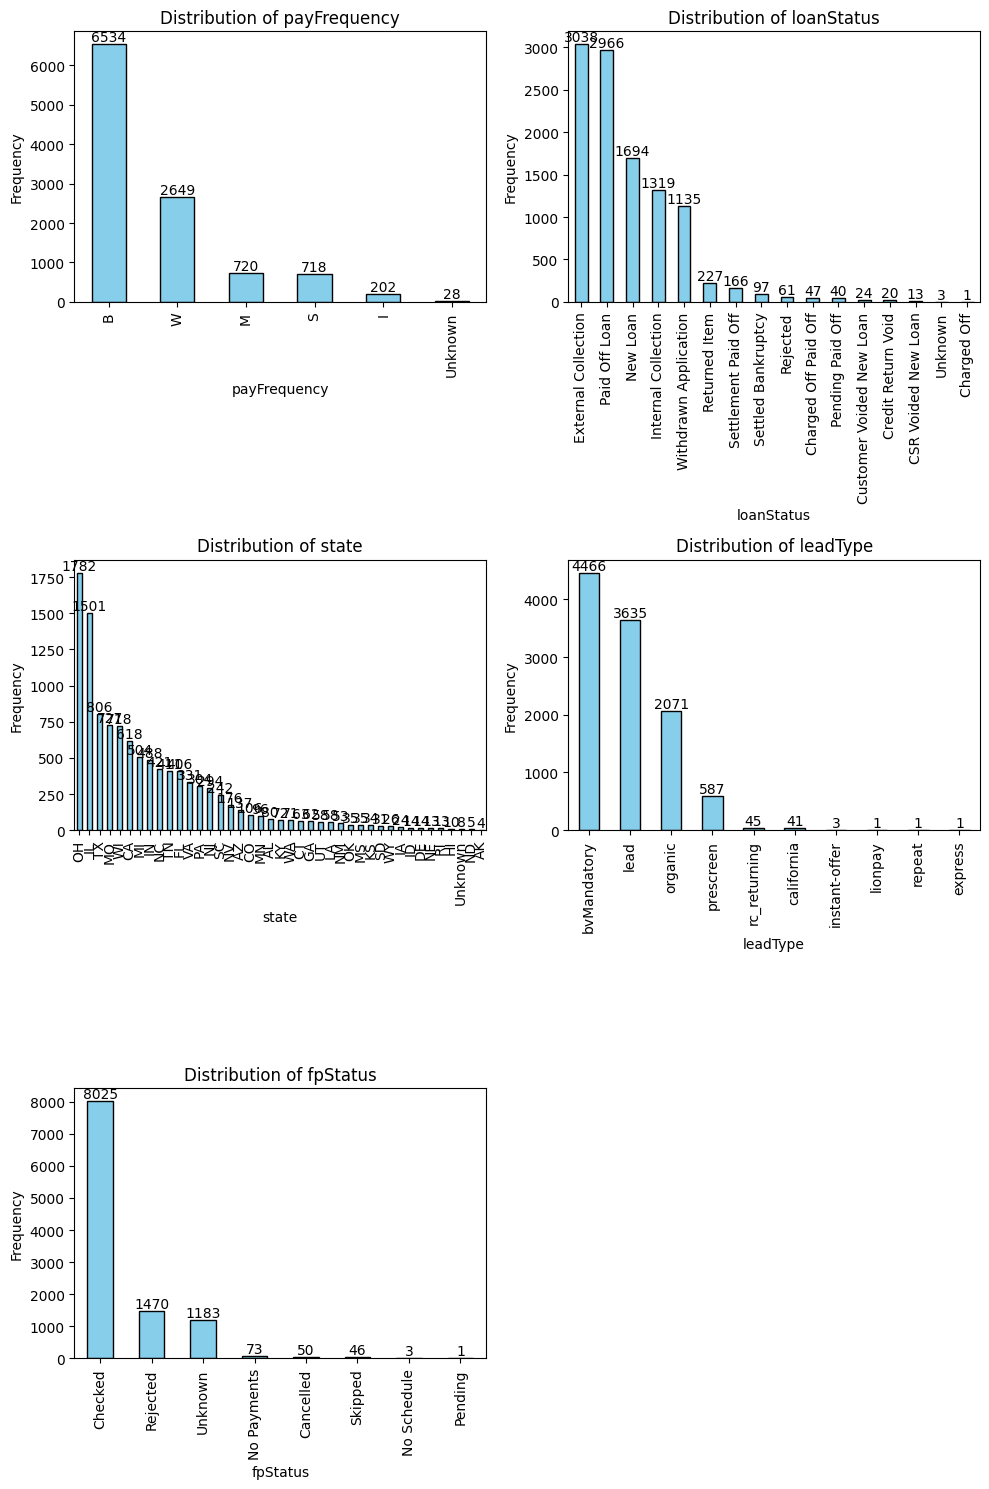

CPU times: total: 2.3 s
Wall time: 3.1 s


In [38]:
%%time
# Set up subplots
categorical_columns = filtered_loan_df.select_dtypes(include=['object']).columns
num_plots           = len(categorical_columns)
nrows               = (num_plots + 1) // 2
ncols               = 2 if num_plots > 1 else 1

fig, axes           = plt.subplots(nrows=nrows, ncols=ncols, 
                                   figsize=(10, 5*nrows), squeeze=False)

for i, col in enumerate(categorical_columns):
    ax   = axes[i//2, i%2]
    bars = filtered_loan_df[col].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # Annotate each bar with the count value
    for bar in bars.patches:
        ax.annotate(f"{int(bar.get_height())}",  # Text to annotate
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position of text
                    ha='center', va='bottom')    # Alignment

    ax.set_title  (f"Distribution of {col}")
    ax.set_xlabel (col)
    ax.set_ylabel ("Frequency")

# Hide any unused subplots (axis)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

### <a id='toc4_3_2_'></a>[-- numerical [Hist + KDE]](#toc0_) [&#8593;](#toc0_)

In [39]:
# Loop through each categorical column and print the count of unique values
for col in filtered_loan_df.select_dtypes(include=['float64', 'int32', 'int64']).columns:
    print(f"Counts of unique values in '{col}':")
    print(filtered_loan_df[col].value_counts())
    print()

Counts of unique values in 'apr':
apr
590.000    3567
645.000    1445
360.000    1302
680.000     540
601.000     476
           ... 
225.000       1
612.000       1
442.890       1
415.625       1
660.000       1
Name: count, Length: 84, dtype: int64

Counts of unique values in 'originated':
originated
1    9670
0    1181
Name: count, dtype: int64

Counts of unique values in 'nPaidOff':
nPaidOff
 0.0     8948
 1.0     1470
 2.0      262
 3.0       92
 4.0       31
 6.0       23
 5.0       12
 18.0       2
 10.0       2
 20.0       2
 11.0       2
 8.0        1
 7.0        1
 19.0       1
 9.0        1
-1.0        1
Name: count, dtype: int64

Counts of unique values in 'approved':
approved
1    9630
0    1221
Name: count, dtype: int64

Counts of unique values in 'isFunded':
isFunded
1    9595
0    1256
Name: count, dtype: int64

Counts of unique values in 'loanAmount':
loanAmount
500.0     1758
400.0     1666
350.0     1198
300.0     1049
600.0     1022
          ... 
845.0        1
65

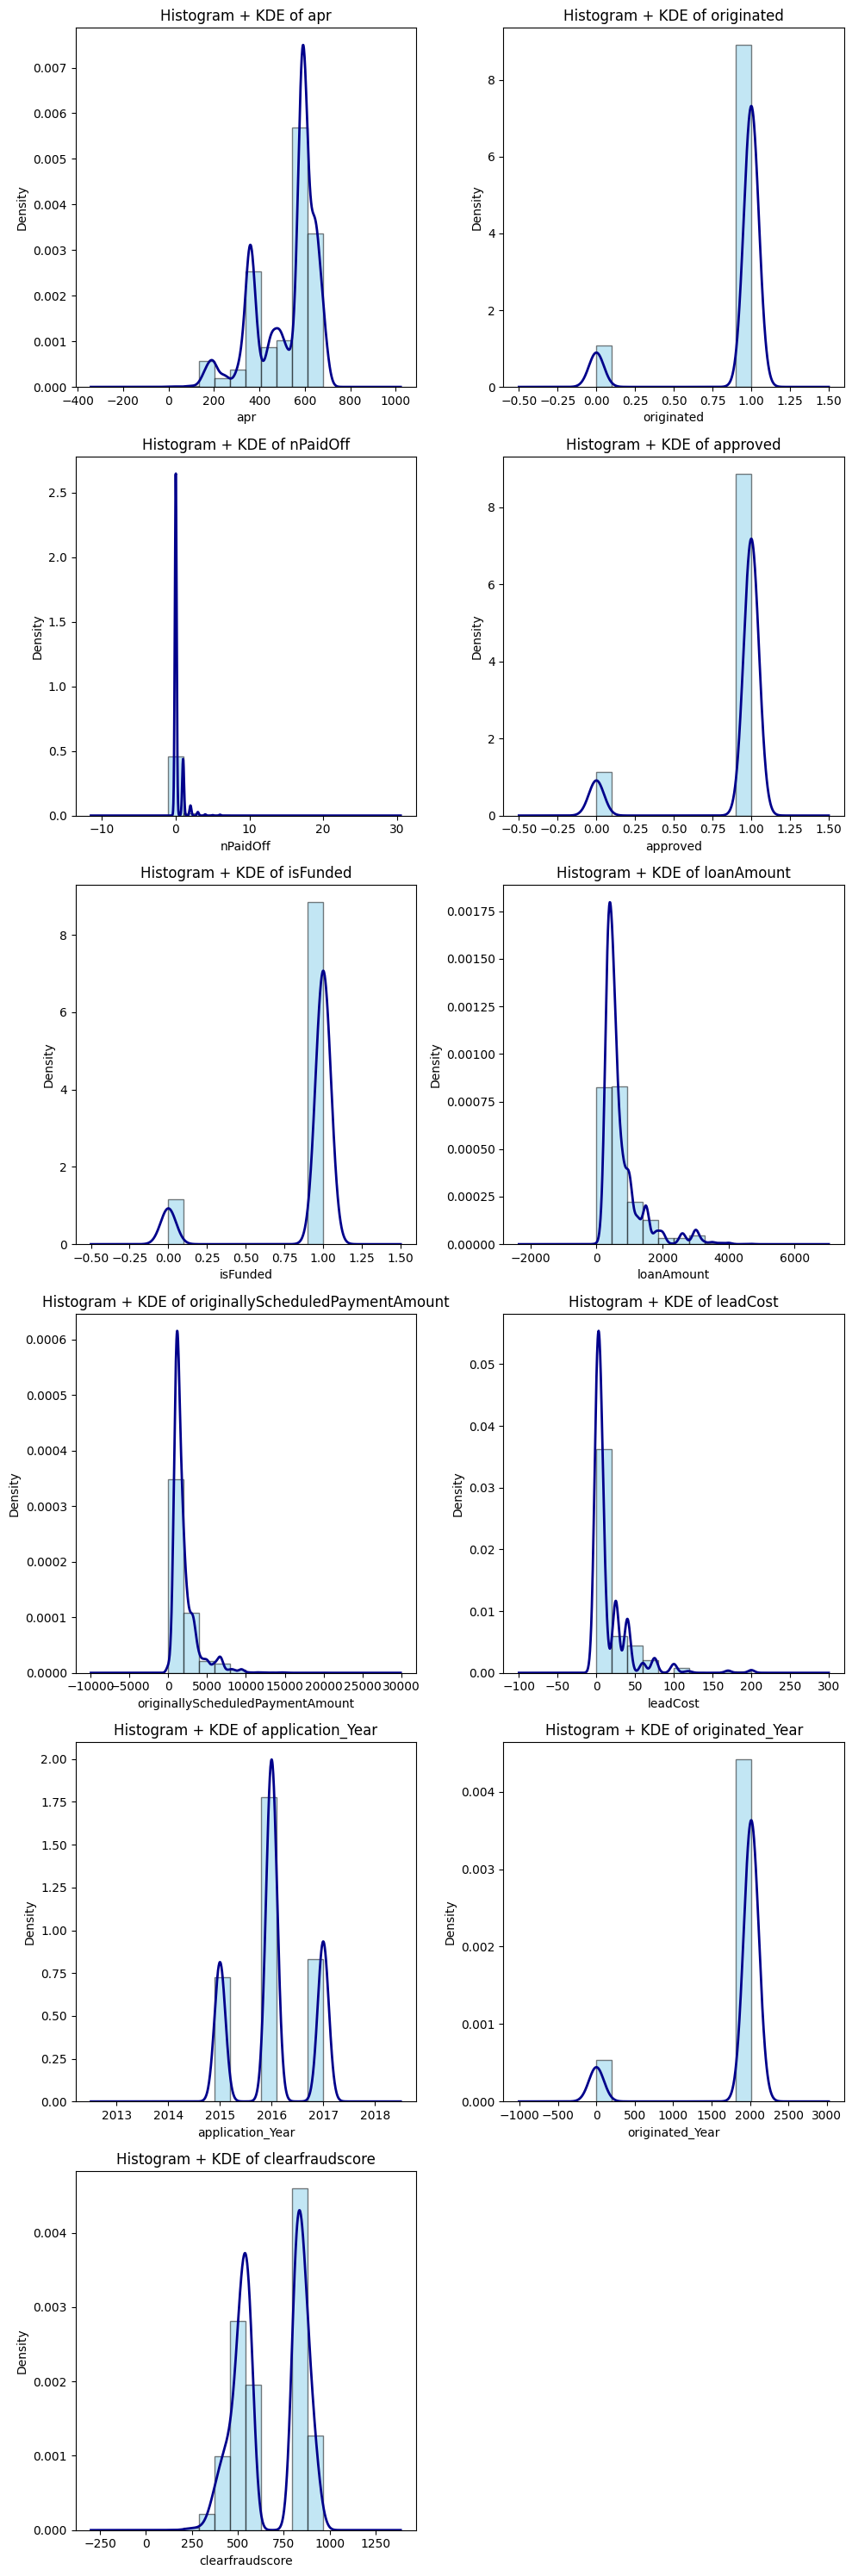

CPU times: total: 11.5 s
Wall time: 14.4 s


In [40]:
%%time
# Set up subplots
numerical_columns   = filtered_loan_df.select_dtypes(include=['float64', 'int32', 'int64']).columns
num_plots           = len(numerical_columns)
nrows               = (num_plots + 1) // 2
ncols               = 2 if num_plots > 1 else 1

fig, axes           = plt.subplots(nrows=nrows, ncols=ncols, 
                                   figsize=(10, 5*nrows), squeeze=False)

for i, col in enumerate(numerical_columns):
    ax   = axes[i//2, i%2]
    # Plot histogram
    filtered_loan_df[col].plot(kind='hist', bins=10, ax=ax, density=True, alpha=0.5, color='skyblue', edgecolor='black')
    # Overlay KDE
    filtered_loan_df[col].plot(kind='kde' , ax=ax  , color='darkblue', linewidth=2)

    ax.set_title  (f"Histogram + KDE of {col}")
    ax.set_xlabel (col)
    ax.set_ylabel ("Density")

# Hide any unused subplots (axis)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

---
## <a id='toc4_4_'></a>[Part d: `Heatmap` & `Boxplot` for payment (3+3)](#toc0_)
- _Categorical Data using Heatmap_: 
  <br>**Ex**--> Display the occurance/trends of each unique values in isCollection_1 (`iscollection` with `installationIndex`=1)
- _Numerical Data using Boxplot_  : 
  <br>**Ex**--> View the outliers, interquartile range, min/max of principal_1 (`principal` with `installationIndex`=1)
> **Note**: These graph is grouped by respective prefix. -> isCollection, paymentAmount, ...

In [41]:
# Start from the specified columns onward
selected_groups = df_temp['Columns_Name'][23:].tolist()
selected_groups = [col for col in selected_groups if '_' in col]
selected_groups.remove('loan_repay')
print(f"Selected {len(selected_groups)} columns for analysis:\n", selected_groups)

Selected 735 columns for analysis:
 ['isCollection_1', 'isCollection_2', 'isCollection_3', 'isCollection_4', 'isCollection_5', 'isCollection_6', 'isCollection_7', 'isCollection_8', 'isCollection_9', 'isCollection_10', 'isCollection_11', 'isCollection_12', 'isCollection_13', 'isCollection_14', 'isCollection_15', 'isCollection_16', 'isCollection_17', 'isCollection_18', 'isCollection_19', 'isCollection_20', 'isCollection_21', 'isCollection_22', 'isCollection_23', 'isCollection_24', 'isCollection_25', 'isCollection_26', 'isCollection_27', 'isCollection_28', 'isCollection_29', 'isCollection_30', 'isCollection_31', 'isCollection_32', 'isCollection_33', 'isCollection_34', 'isCollection_35', 'isCollection_36', 'isCollection_37', 'isCollection_38', 'isCollection_39', 'isCollection_40', 'isCollection_41', 'isCollection_42', 'isCollection_43', 'isCollection_44', 'isCollection_45', 'isCollection_46', 'isCollection_47', 'isCollection_48', 'isCollection_49', 'isCollection_50', 'isCollection_51', 'is

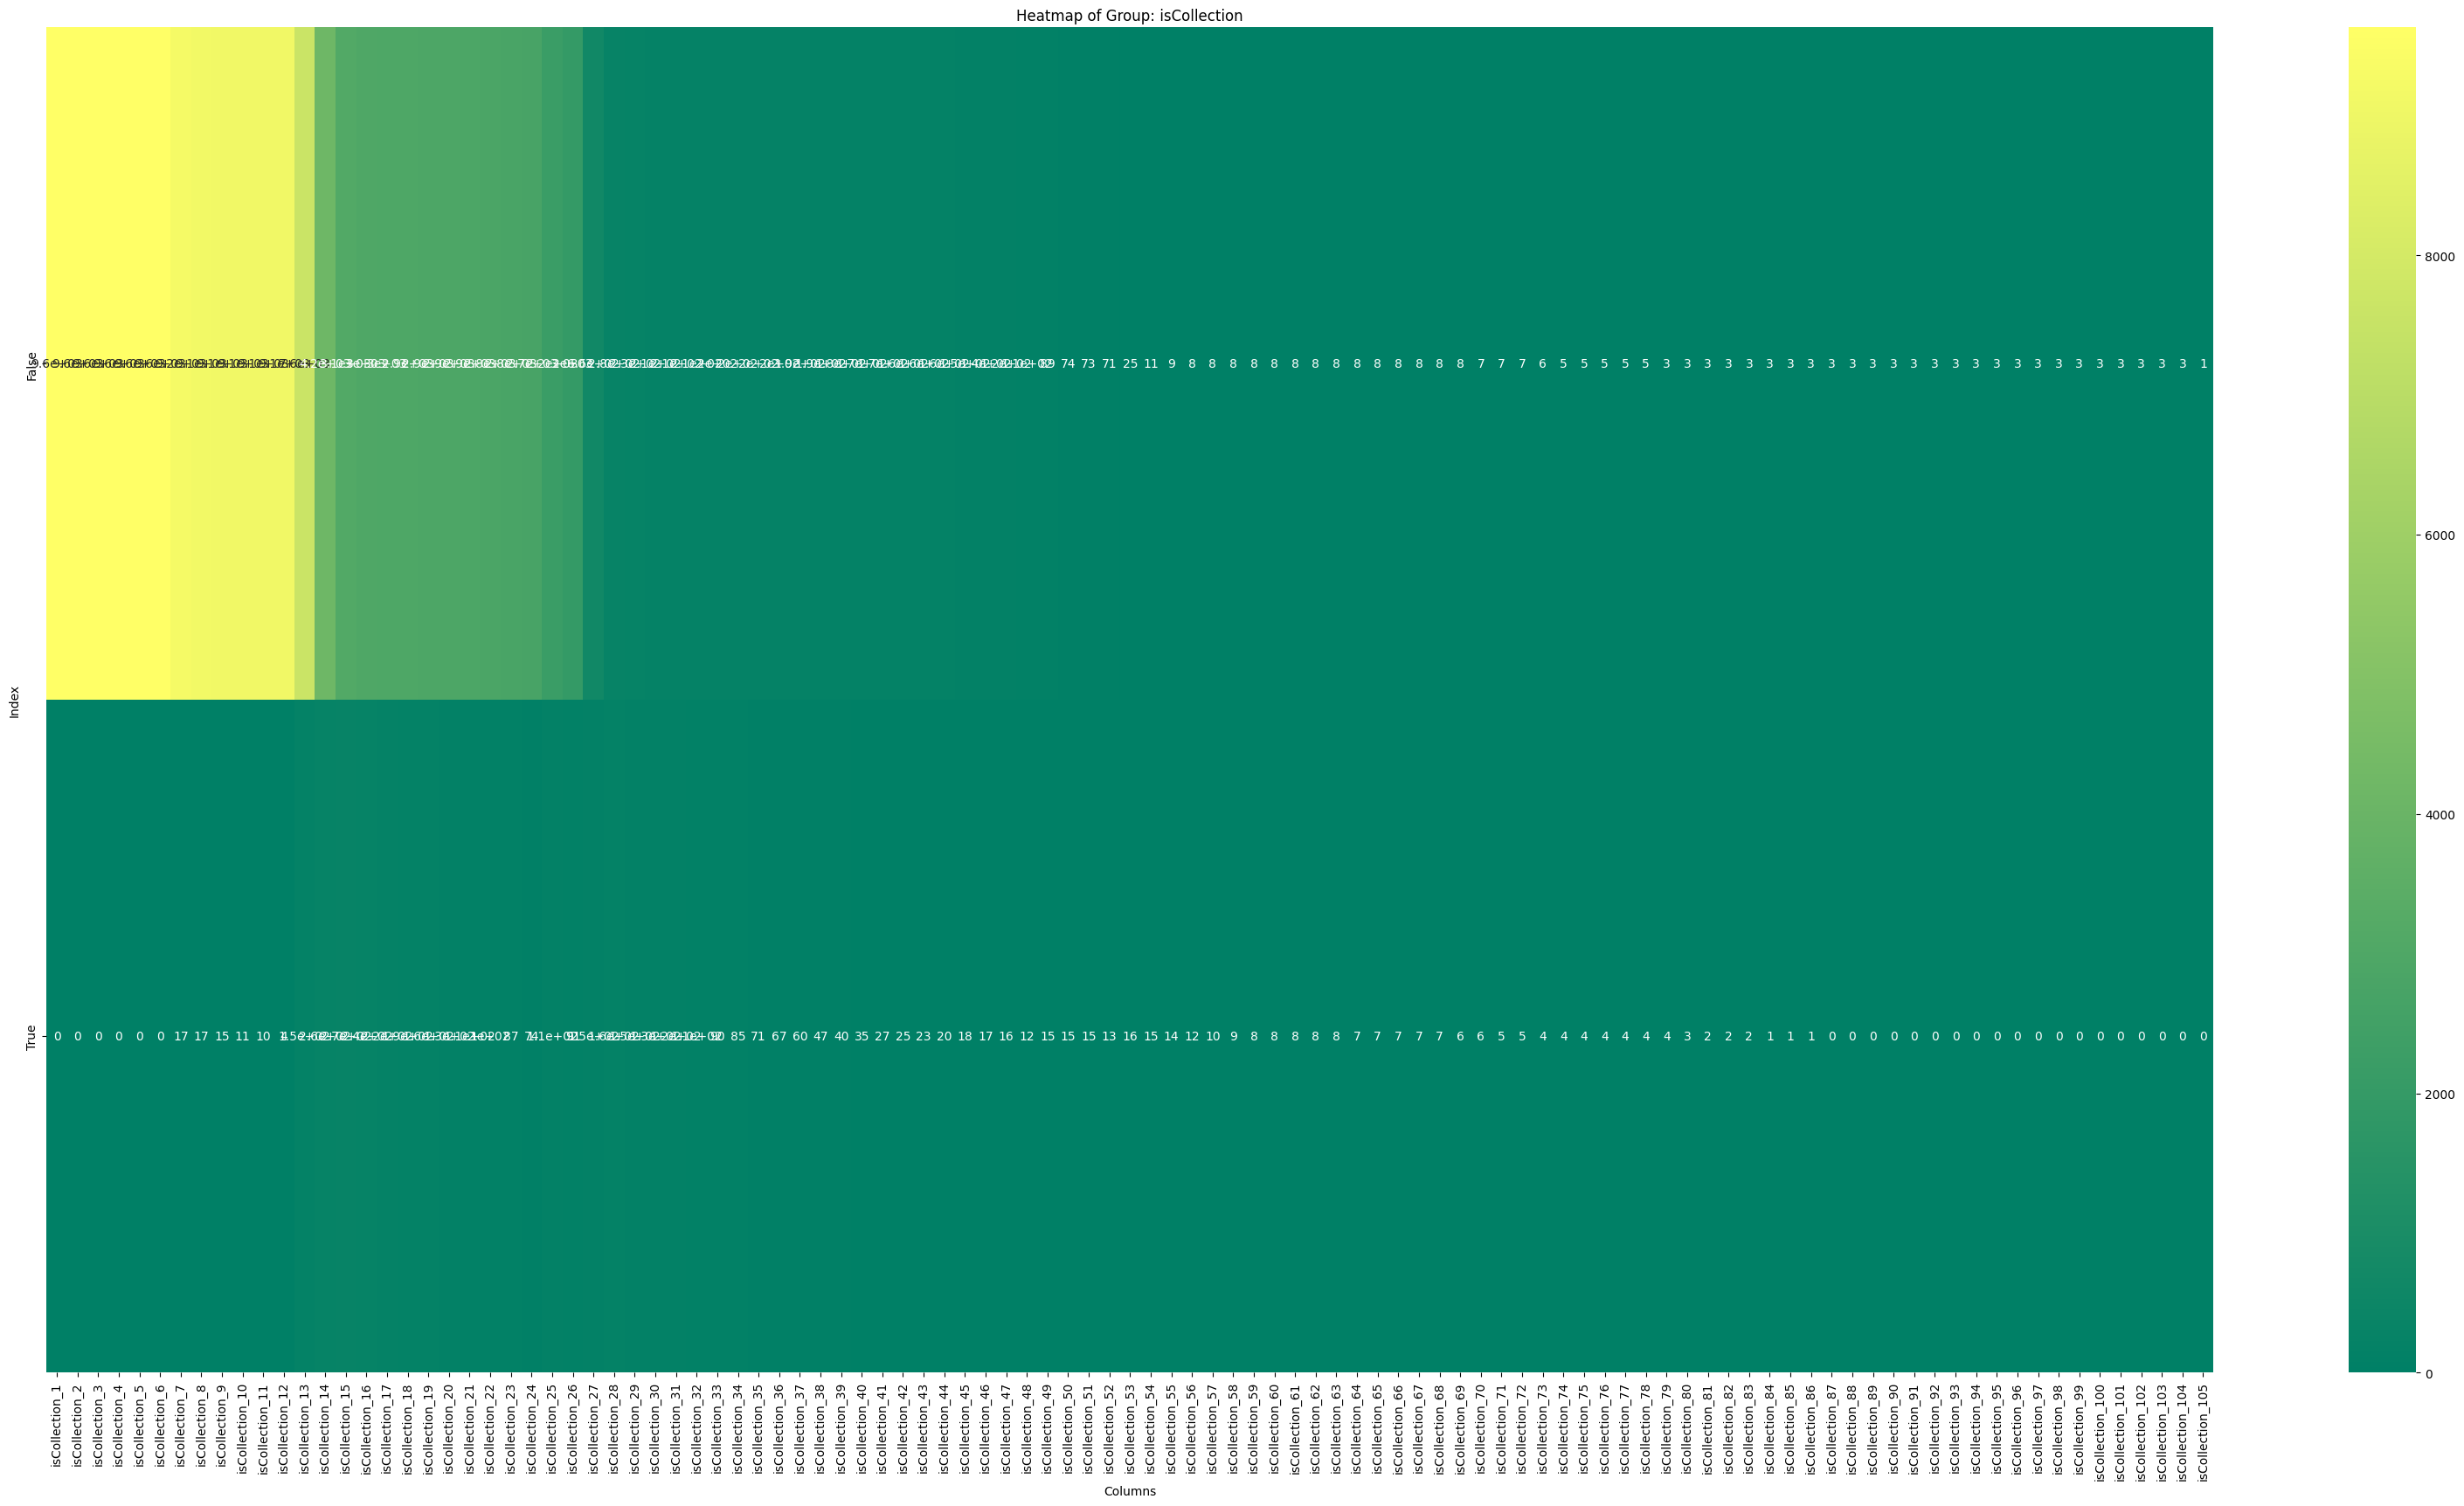

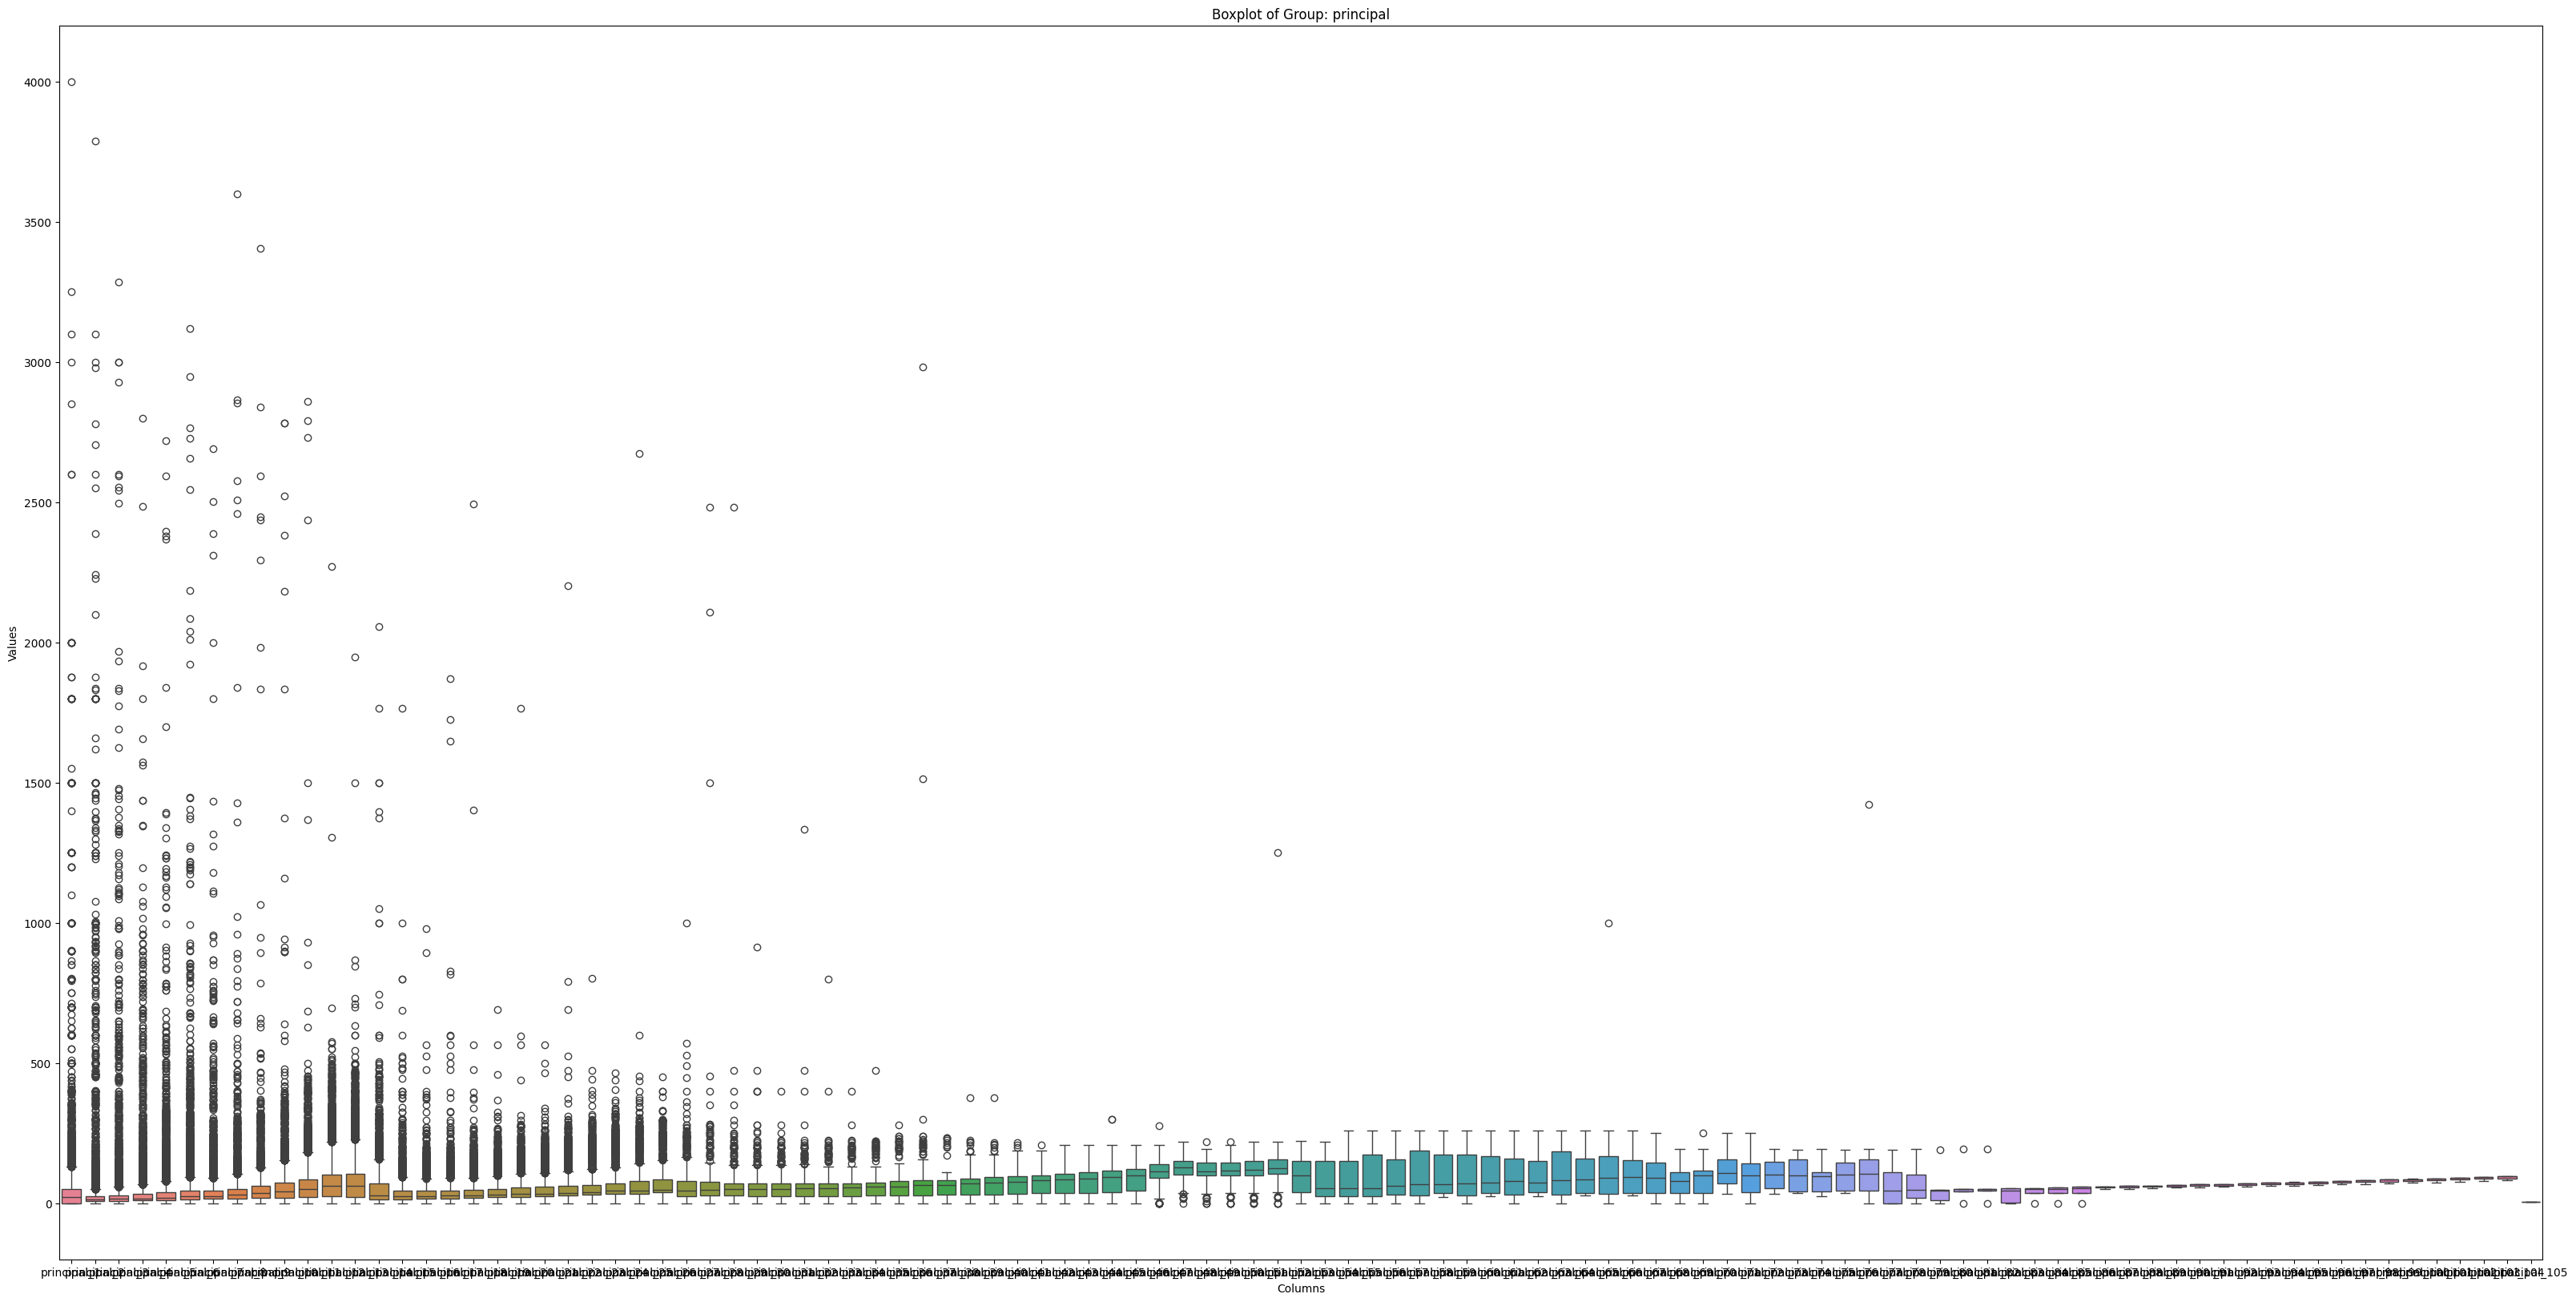

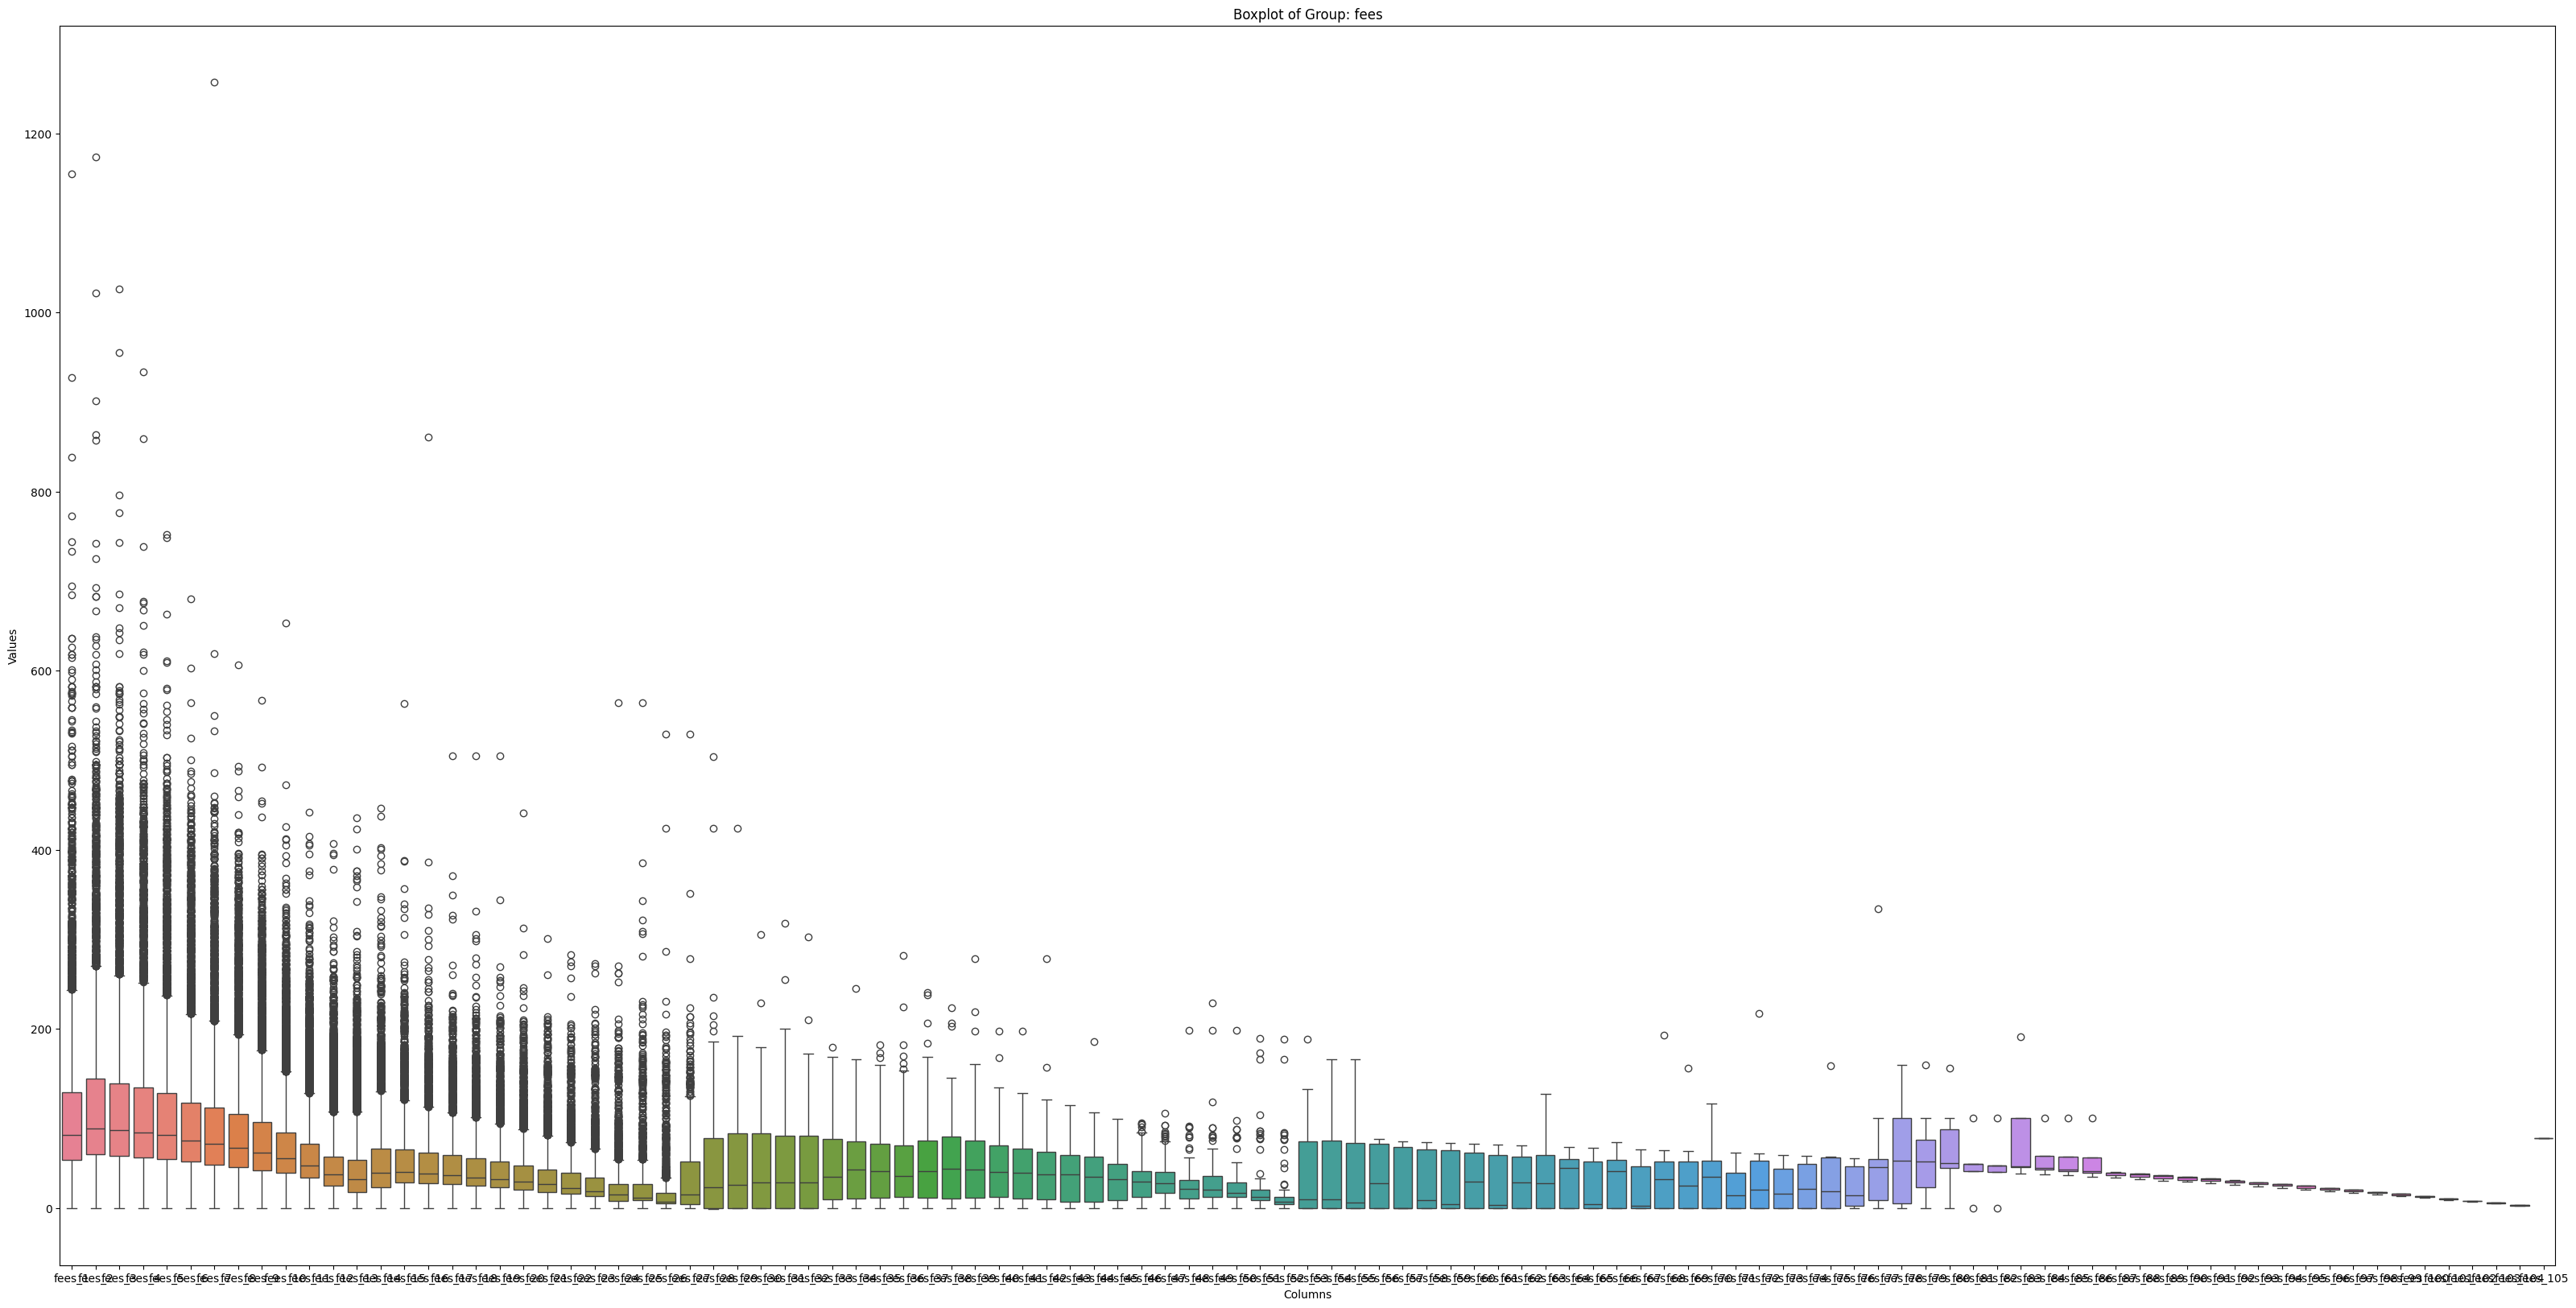

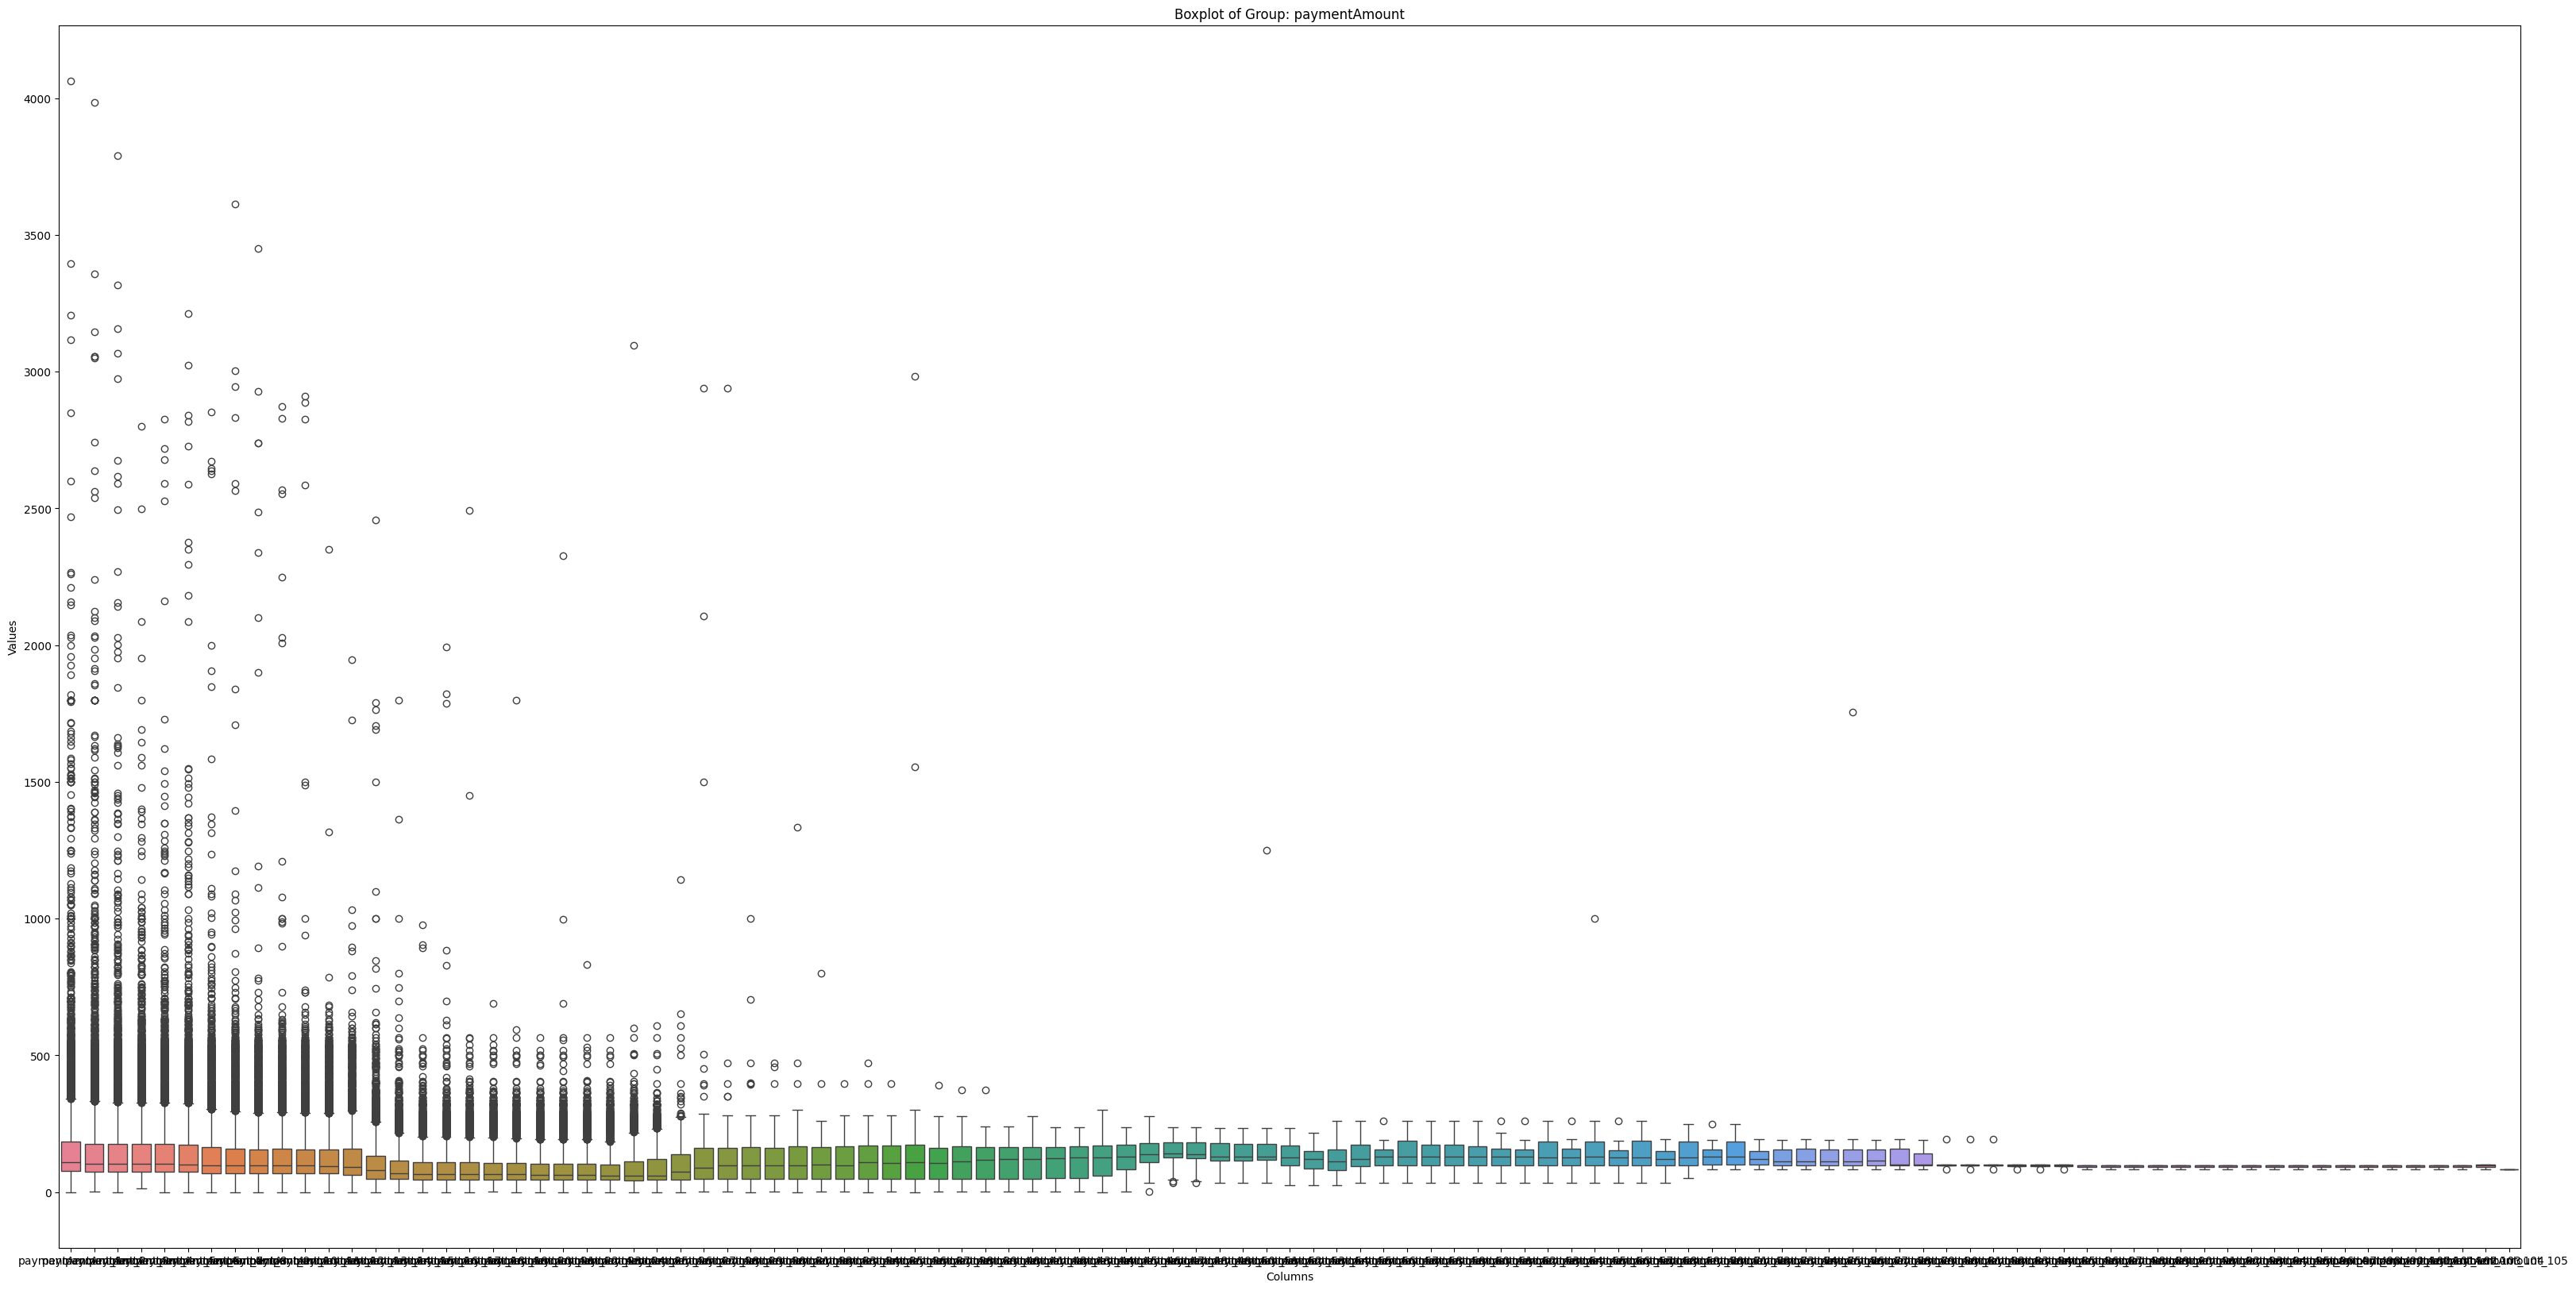

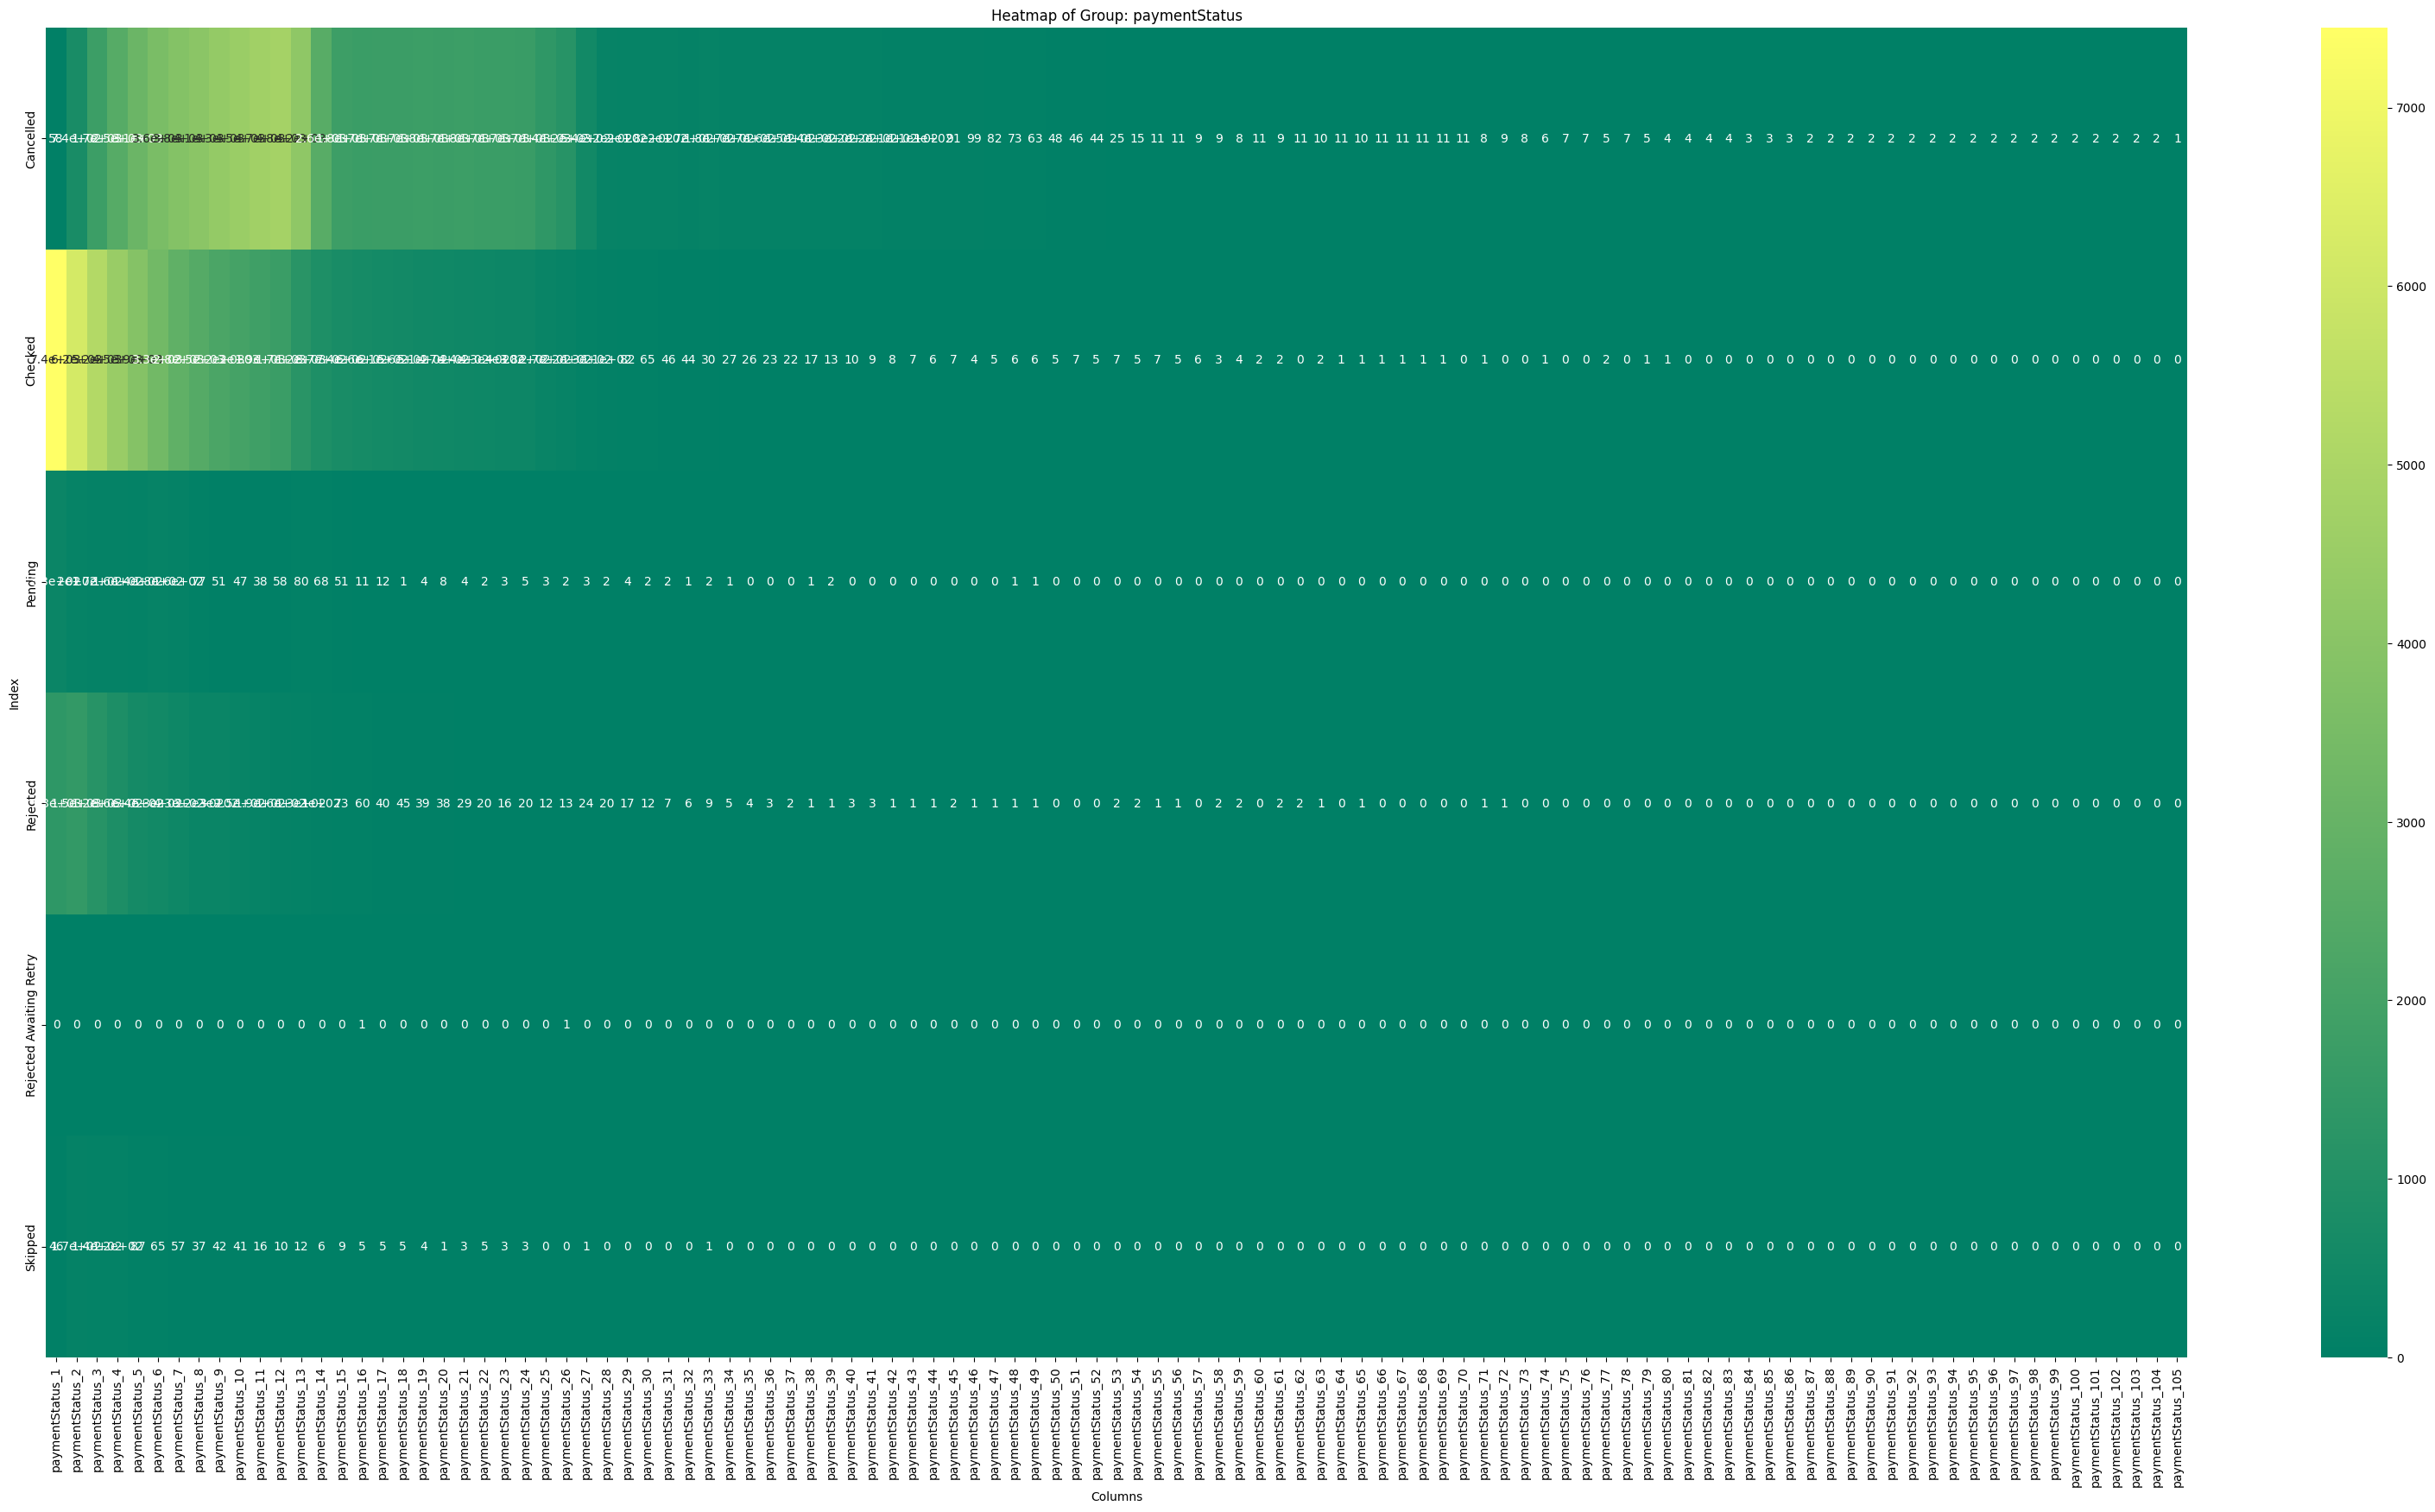

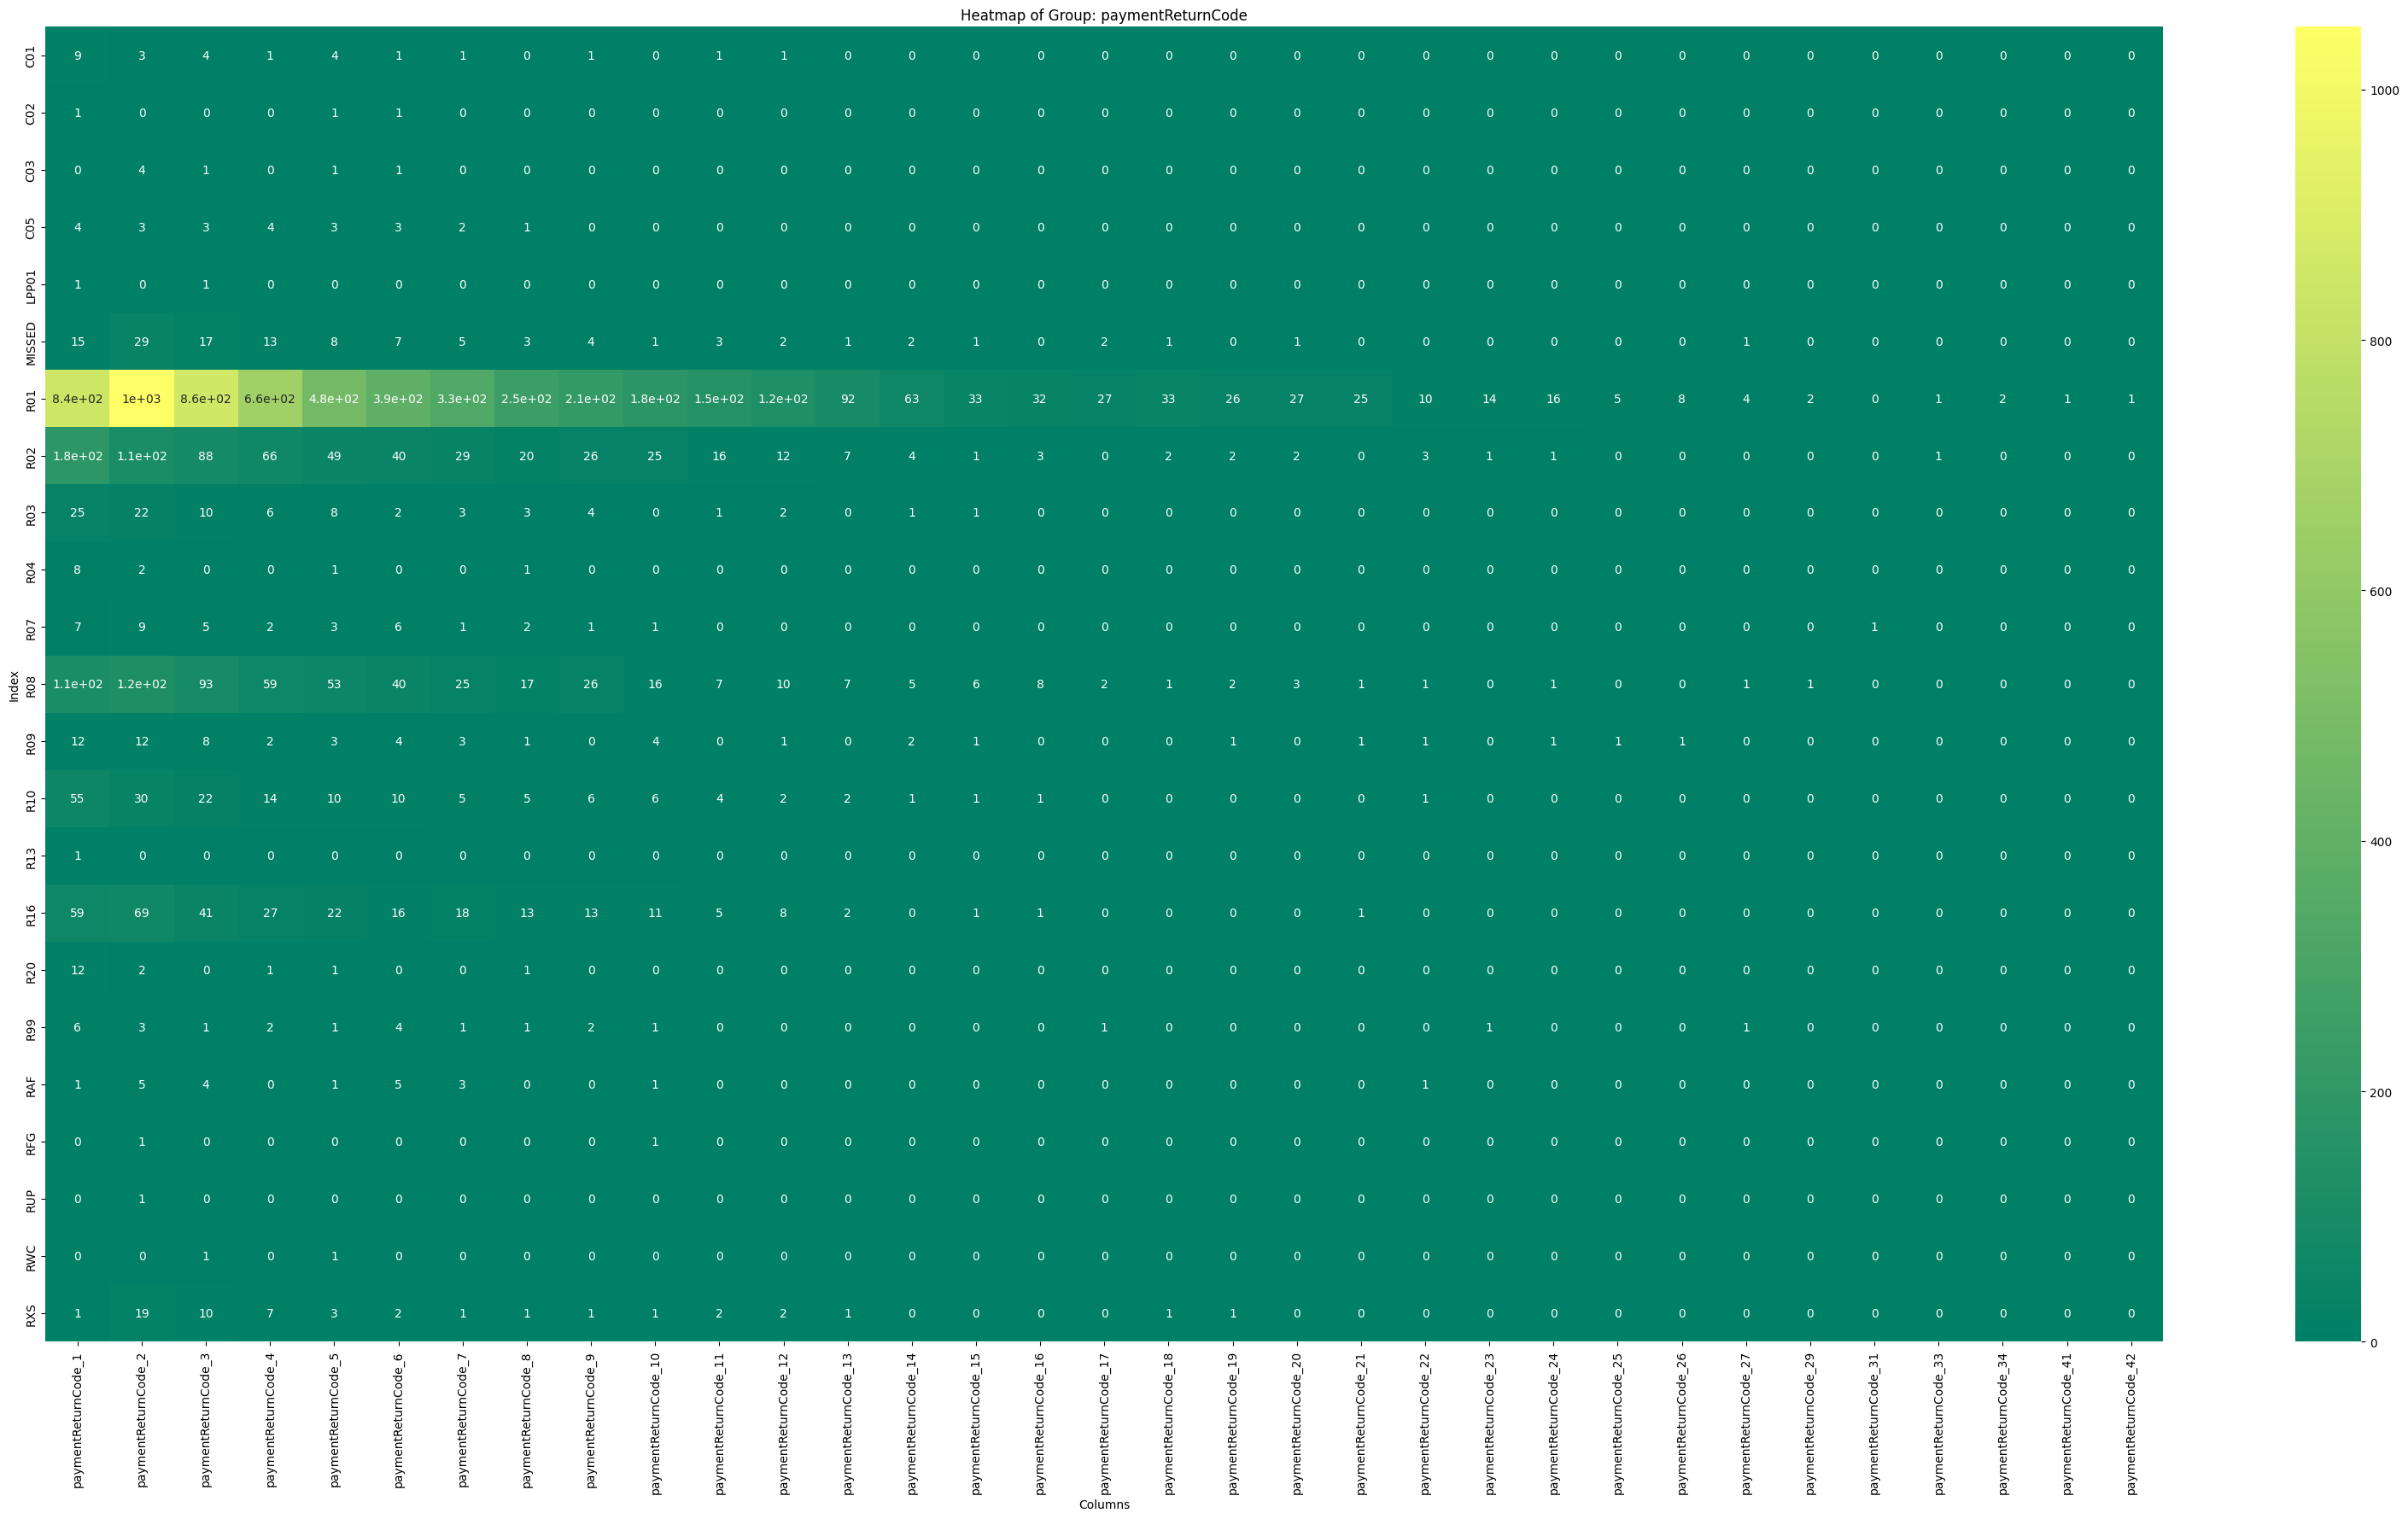

CPU times: total: 33.7 s
Wall time: 40 s


In [42]:
%%time
# Group columns in df_temp based on prefixes
groups = {}
for col in df_temp['Columns_Name']:
    # Only plot if the group name is in the selected range and contains '_'
    if col in selected_groups:
        prefix = col.split('_')[0]  # Group by prefix (e.g., 'isCollection', 'paymentdate', 'principal', ...)
        if prefix!='paymentDate':
            groups.setdefault(prefix, []).append(col)

# Plot each group separately from train_df using a heatmap and boxplots
for group_name, columns in groups.items():
    # Filter out columns that are completely None
    columns_to_plot = [col for col in columns if train_df[col].notnull().any()]
    # print(columns_to_plot)

    # Check if there are columns to plot
    if columns_to_plot:
        group_data_counts = train_df[columns_to_plot].apply(lambda col: col.value_counts()).fillna(0)
        
        # Determine if the columns are of object type for heatmap or boxplot
        if train_df[columns_to_plot].dtypes.eq('object').any():
            plt.figure(figsize=(40, 20))
            sns.heatmap(group_data_counts, annot=True, cmap="summer", cbar=True)
            plt.title(f"Heatmap of Group: {group_name}")
            plt.xlabel("Columns")
            plt.ylabel("Index")
            plt.show()
        else:
            plt.figure(figsize=(40, 20))
            sns.boxplot(data=train_df[columns_to_plot])
            plt.title(f"Boxplot of Group: {group_name}")
            plt.xlabel("Columns")
            plt.ylabel("Values")
            plt.show()

---
## <a id='toc4_5_'></a>[Part e: `Bar` & `Hist + KDE` for clarity underwriting variables (18+12)](#toc0_)
- _Categorical Data using Bar Charts_: Null values are filled with *-1* to ensure that missing data is included in the visualization
- _Numerical Data using Histogram with Kernel Density Estimation (KDE)_: Null values are replaced with 'Unknown' to avoid gaps in the histogram and KDE plots.

In [43]:
# Specific rows we want to use for column names
selected_rows    = list(range(758, 810))
# Extract unique column names from selected rows
selected_columns = df_temp.loc[(selected_rows), 'Columns_Name'].tolist()
print(f"Selected {len(selected_columns)} columns: ")
selected_columns

Selected 52 columns: 


['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.i

In [44]:
%%time
# Filter train_df to only the selected categorical columns
filtered_clarity_df         = train_df[selected_columns]
filtered_clarity_df

CPU times: total: 0 ns
Wall time: 6 ms


.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                                      9.0   
1                                                                      3.0   
2                                                                      5.0   
3                                                                      2.0   
4                                                                      5.0   
...                                                                    ...   
10846                                                                  3.0   
10847                                                                 27.0   
10848                                                                 14.0   
10849                                                                  3.0   
10850                                                                  2.0   

       .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                                        7.0      
1                                                                        3.0      
2                                                                        5.0      
3                                                                        2.0      
4                                                                        4.0      
...                                                                      ...      
10846                                                                    3.0      
10847                                                                   14.0      
10848                                                                    4.0      
10849                                                                    3.0      
10850                                                                    2.0      

       .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0                                                                     1.0   
1                                                                     3.0   
2                                                                     5.0   
3                                                                     2.0   
4                                                                     4.0   
...                                                                   ...   
10846                                                                 3.0   
10847                                                                 1.0   
10848                                                                 1.0   
10849                                                                 3.0   
10850                                                                 1.0   

       .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
0                                                                   6.0   
1                                                                   3.0   
2                                                                   5.0   
3                                                                   2.0   
4                                                                   4.0   
...                                                                 ...   
10846                                                               3.0   
10847                                                               1.0   
10848                                                               2.0   
10849                                                               3.0   
10850                                                               1.0   

       .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
0                                                                      9.0   
1                                                                      3.0   
2            

In [45]:
filtered_clarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Data columns (total 52 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  10851 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             10851 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   10851 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     10851 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  10851

In [46]:
# Make sure all nulls values is filled
for col in filtered_clarity_df.columns:
    if filtered_clarity_df[col].dtype == np.float64:
        filtered_clarity_df[col] = filtered_clarity_df[col].fillna(-1)
    else:
        filtered_clarity_df[col] = filtered_clarity_df[col].fillna("Unknown")
filtered_clarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Data columns (total 52 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  10851 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             10851 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   10851 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     10851 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  10851

### <a id='toc4_5_1_'></a>[-- categorical [bar]](#toc0_) [&#8593;](#toc0_)

In [47]:
# Loop through each categorical column and print the count of unique values
for col in filtered_clarity_df.select_dtypes(include='object').columns:
    print(f"Counts of unique values in '{col}':")
    print(filtered_clarity_df[col].value_counts())
    print()

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid':
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid
False      8287
Unknown    1449
True       1115
Name: count, dtype: int64

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate':
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate
False      9842
True        869
Unknown     140
Name: count, dtype: int64

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile':
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile
Unknown    8780
False      1952
True        119
Name: count, dtype: int64

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone':
.underwritingdataclarity.c

.underwritingdataclarity.clearfraud.


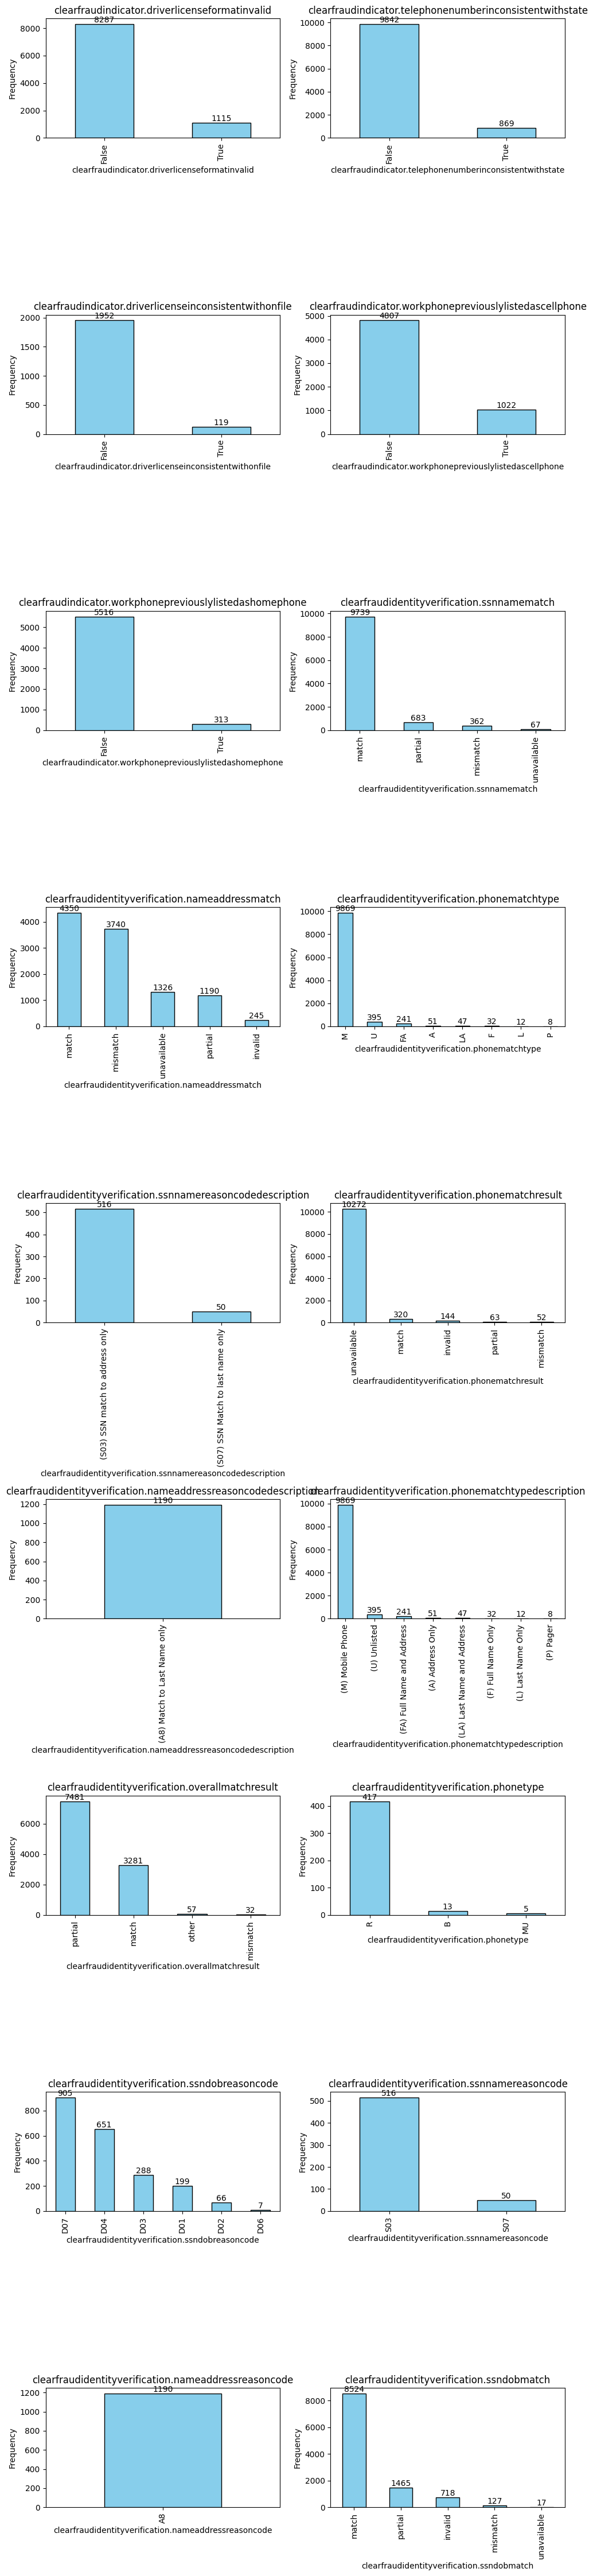

CPU times: total: 4.33 s
Wall time: 5.86 s


In [48]:
%%time
print(".underwritingdataclarity.clearfraud.")
# Set up subplots
categorical_columns = filtered_clarity_df.select_dtypes(include=['object']).columns
num_plots           = len(categorical_columns)
nrows               = (num_plots + 1) // 2
ncols               = 2 if num_plots > 1 else 1

fig, axes           = plt.subplots(nrows=nrows, ncols=ncols, 
                                   figsize=(10, 5*nrows), squeeze=False)

for i, col in enumerate(categorical_columns):
    ax   = axes[i//2, i%2]
    # filter out the 'Unknown' values within each column before plotting 
    bars = filtered_clarity_df[col][~filtered_clarity_df[col].isin(['Unknown'])].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # Annotate each bar with the count value
    for bar in bars.patches:
        ax.annotate(f"{int(bar.get_height())}",  # Text to annotate
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position of text
                    ha='center', va='bottom')    # Alignment

    ax.set_title  ('.'.join(col.split('.')[3:]))
    ax.set_xlabel ('.'.join(col.split('.')[3:]))
    ax.set_ylabel ("Frequency")

# Hide any unused subplots (axis)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

### <a id='toc4_5_2_'></a>[-- numerical [Hist + KDE]](#toc0_) [&#8593;](#toc0_)

In [49]:
# Loop through each categorical column and print the count of unique values
for col in filtered_clarity_df.select_dtypes(include=['float64', 'int32', 'int64']).columns:
    print(f"Counts of unique values in '{col}':")
    print(filtered_clarity_df[col].value_counts())
    print()

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago':
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago
3.0     2412
4.0     1204
5.0     1111
6.0      830
2.0      661
        ... 
57.0       1
72.0       1
78.0       1
59.0       1
73.0       1
Name: count, Length: 70, dtype: int64

Counts of unique values in '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago':
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago
3.0     3712
4.0     1418
2.0     1322
5.0     1173
6.0      655
1.0      523
7.0      436
8.0      360
9.0      247
10.0     201
11.0     141
12.0     132
13.0      90
14.0      75
15.0      59
16.0      46
17.0      41
19.0      40
18.0      40
20.0      27
22.0      16
21.0      16
27.0      16
24.0      12
23.0      11
25.0       9
26.0       9
29.0       6
33.0       3
36.0       3
30.0       2
31.0       2
35.0       2
32.0       2
41.0       1
48.0       1
28.0    

.underwritingdataclarity.clearfraud.


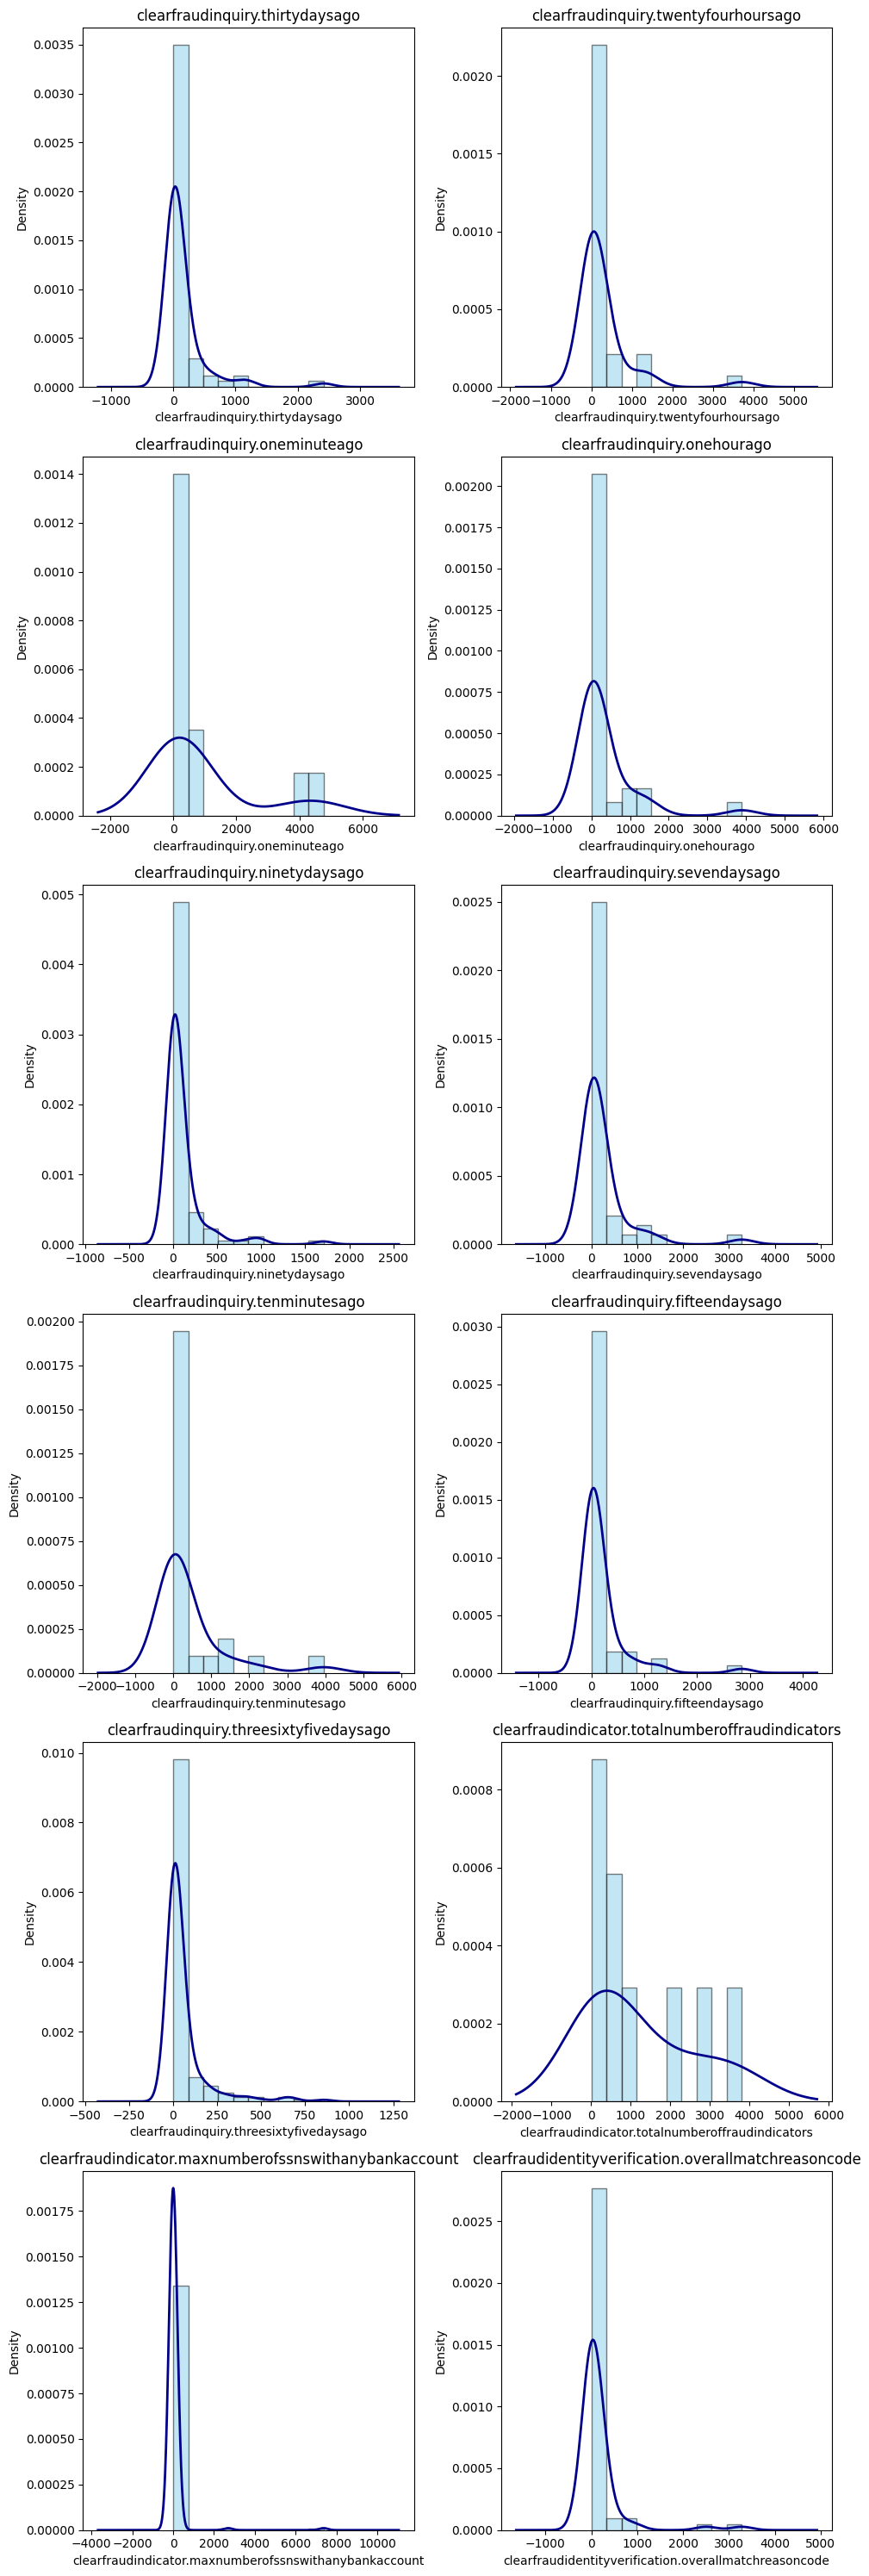

CPU times: total: 3.88 s
Wall time: 4.69 s


In [50]:
%%time
print(".underwritingdataclarity.clearfraud.")
# Set up subplots
numerical_columns   = filtered_clarity_df.select_dtypes(include=['float64', 'int32', 'int64']).columns
num_plots           = len(numerical_columns)
nrows               = (num_plots + 1) // 2
ncols               = 2 if num_plots > 1 else 1

fig, axes           = plt.subplots(nrows=nrows, ncols=ncols, 
                                   figsize=(10, 5*nrows), squeeze=False)

for i, col in enumerate(numerical_columns):
    ax   = axes[i//2, i%2]

    # Plot histogram
    # filter out the 'Unknown' values within each column before plotting 
    filtered_clarity_df[col][~filtered_clarity_df[col].isin([-1])].value_counts().plot(kind='hist', bins=10, ax=ax, density=True, alpha=0.5, color='skyblue', edgecolor='black')
    # Overlay KDE
    filtered_clarity_df[col][~filtered_clarity_df[col].isin([-1])].value_counts().plot(kind='kde' , ax=ax  , color='darkblue', linewidth=2)

    ax.set_title  ('.'.join(col.split('.')[3:]))
    ax.set_xlabel ('.'.join(col.split('.')[3:]))
    ax.set_ylabel ("Density")

# Hide any unused subplots (axis)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

# <a id='toc5_'></a>[Models](#toc0_)

**Objective**: Train and test models using `XGBClassifier`, `LGBMClassifier`, `HistGradientBoostingClassifier`, which can effectively deals with null values. Finally, plot with `Waterfall` & `Summary plot` using *Shap* library.

---
## <a id='toc5_1_'></a>[Part a: Split into X Y test train](#toc0_)
- _Split X Y Test Train_: Model training and Model Testing. Y class labels columns will be `loan_repay` (the synthesized label) --> has ClearFraud, repayment occur. 
- _Target Metrics_      : Is the synthesized label that created at **Data Preprocsssing (Part C)**
    - target metrics was labeled by the following condition
        - clearfraudscore >= 800 : Label as 1
        - clearfraudscore <= 570 : Label as 0 
        - others                 : None
    - _Rationale behind_ this choice was to evaluate whether a client would repay their loan, either with a given clearfraudscore or not.
    - Straightforward example: If a client's loan application is accepted, but fraudscore information were missing. Then with the given informations/fields, we can apply our loan prediction system to predict whether the client is going to repay the loan or not after the loan payment is funded (released/given).
    - Output: (False / 0: Client does not pay the loan, True / 1: Client pays the loan)

In [ ]:
train_df     = pd.read_csv("new_data/train_df.csv")
test_df      = pd.read_csv("new_data/test_df.csv")

train_df     = train_df.reset_index(drop=True)
test_df      = test_df.reset_index(drop=True)

# Drop all paymentDate (as it does not contribute)
cols_to_drop = ['clearfraudscore'] + [col for col in train_df.columns if col.startswith("paymentDate")] 
train_df     = train_df.drop(columns=cols_to_drop)
test_df      = test_df.drop(columns=cols_to_drop)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Columns: 706 entries, payFrequency to loan_repay
dtypes: bool(25), float64(408), int64(7), object(266)
memory usage: 56.6+ MB


In [53]:
train_df['loan_repay'].value_counts()

loan_repay
False    5486
True     5365
Name: count, dtype: int64

In [54]:
# Convert 'object' type to 'category' type for training
train_df[train_df.select_dtypes(['object']).columns] = train_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
test_df [test_df.select_dtypes(['object']).columns]  = test_df.select_dtypes (['object']).apply(lambda x: x.astype('category'))

In [ ]:
# For training set
X_train = train_df.drop(columns=['loan_repay'] + [col for col in train_df.columns if col.startswith("paymentDate")])
Y_train = train_df['loan_repay']


# For test set
X_test  = test_df.drop(columns=['loan_repay'] + [col for col in train_df.columns if col.startswith("paymentDate")])
for col in X_train:
    if X_train[col].isnull().sum() == len(X_train):         # If all value is nan
        X_test[col] = [None] * len(X_test)

X_test  = X_test.astype(X_train.dtypes.to_dict())
Y_test  = test_df['loan_repay']

---
## <a id='toc5_2_'></a>[Part b: Model Training](#toc0_)
- _Model Training_: Model training using `XGBClassifier`, `LGBMClassifier`, `HistGradientBoostingClassifier`, which can effectively deals with null values for real-world datasets that usually come with empty values.
- _Model Saving_  : saved as 'new_data/{model_name}_classifier_model.pkl' for easier model testing.
> *Note*: If no model retraining is necessary, can jumped to **Input Prediction for usecase**.

In [56]:
# Initialize classifiers with baseline parameters
xgbc     = XGBClassifier (n_jobs=-1, enable_categorical=True, use_label_encoder=False, eval_metric='logloss')
lgbmc    = LGBMClassifier(n_jobs=-1, verbose=-1)
hist_gb  = HistGradientBoostingClassifier(verbose=0, categorical_features=X_train.select_dtypes(['category']).columns)

In [57]:
# All parameter were choosen randomly within the suggested range.
# Parameter grid for XGBClassifier
xgb_param_grid = {
    'n_estimators'      : [50, 100, 200],
    'max_depth'         : [3, 5, 7],            # between 3 to 10
    'learning_rate'     : [0.01, 0.05, 0.1],    # between 0.05 to 0.3
    'subsample'         : [0.6, 0.8, 1.0],      # between 0.5 to 0.9
    'colsample_bytree'  : [0.6, 0.8, 1.0]       # between 0.5 to 0.9 (same as subsample)
}

# Parameter grid for LGBMClassifier
lgbm_param_grid = {
    'n_estimators'  : [50, 100, 200],
    'max_depth'     : [-1, 10, 20],
    'learning_rate' : [0.01, 0.05, 0.1],
    'num_leaves'    : [20, 30, 40],
    'subsample'     : [0.6, 0.8, 1.0]
}

# Parameter grid for HistGradientBoostingClassifier
hist_gb_param_grid = {
    'max_iter'          : [50, 100, 200],
    'max_depth'         : [None, 10, 20],         # Default=None, isn't constrainted by default
    'learning_rate'     : [0.01, 0.05, 0.1],
    'min_samples_leaf'  : [20, 30, 40],
    'max_leaf_nodes'    : [15, 30, 60]
}

In [58]:
# WARNING!!! Take time
# Set up models, parameter grids, and names in lists
models      = [xgbc, lgbmc, hist_gb]
param_grids = [xgb_param_grid, lgbm_param_grid, hist_gb_param_grid]
model_names = ["XGBClassifier", "LGBMClassifier", "HistGradientBoostingClassifier"]
best_params_list = []

# Loop through each model and perform RandomizedSearchCV
for model, param_grid, name in zip(models, param_grids, model_names):
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator           = model,
        param_distributions = param_grid,
        n_iter              = 20,
        scoring             = 'f1',
        n_jobs              = -1,
        cv                  = 5,
        verbose             = 1,
        random_state        = 0
    )
    
    # Fit the RandomizedSearchCV
    print(f"Tuning {name}...")
    random_search.fit(X_train, Y_train)
    print(f"Best parameters for {name}: ", random_search.best_params_)
    print(f"Best score for {name}     : ", random_search.best_score_)
    best_params_list.append(random_search.best_params_)

Tuning XGBClassifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for XGBClassifier:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best score for XGBClassifier     :  0.9476664105424846
Tuning LGBMClassifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for LGBMClassifier:  {'subsample': 0.6, 'num_leaves': 20, 'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1}
Best score for LGBMClassifier     :  0.9452691296714519
Tuning HistGradientBoostingClassifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for HistGradientBoostingClassifier:  {'min_samples_leaf': 30, 'max_leaf_nodes': 30, 'max_iter': 200, 'max_depth': 20, 'learning_rate': 0.05}
Best score for HistGradientBoostingClassifier     :  0.9477772548946577


In [59]:
%%time
## Train again with the best settings
xgbc        = XGBClassifier(**best_params_list[0] , n_jobs=-1, enable_categorical=True)
lgbmc       = LGBMClassifier(**best_params_list[1], n_jobs=-1, verbose=0)
hist_gb     = HistGradientBoostingClassifier(**best_params_list[2], verbose=0,
                                          categorical_features=X_train.select_dtypes(['category']).columns)

# Train all classifiers
models_name = ['xgbc', 'lgbmc', 'hist_gb']
models      = [ xgbc ,  lgbmc,   hist_gb ]
all_models  = dict(zip(models_name, models))
for model_name in tqdm(all_models):
    all_models[model_name] = all_models[model_name].fit(X_train, Y_train)

100%|██████████| 3/3 [00:37<00:00, 12.40s/it]

CPU times: total: 51.9 s
Wall time: 37.2 s


In [60]:
# Save the model
for model_name, model in zip(models_name, models):
    joblib.dump(model, f"new_data/{model_name}_classifier_model.pkl")

---
## <a id='toc5_3_'></a>[Part c: Model Testing <Final Result is HERE!!!>](#toc0_)
- _Model Testing_: Model testing using `XGBClassifier`, `LGBMClassifier`, `HistGradientBoostingClassifier`.
> *Note*: Considering all metrics, **LGBMClassifier** performs best overall, as it consistently scores the highest across most key metrics. (Especially for F1_score)

In [61]:
# Evaluate models on the test set
test_results = {}

for model_name, model in all_models.items():
    # Predict on validation set
    y_pred       = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy     = accuracy_score(Y_test, y_pred)
    precision    = precision_score(Y_test, y_pred, average="binary")
    recall       = recall_score(Y_test, y_pred, average="binary")
    f1           = f1_score(Y_test, y_pred, average="binary")
    auc          = roc_auc_score(Y_test, y_pred_proba) if y_pred_proba is not None else None
    # Count correct predictions
    match_count  = (y_pred == Y_test).sum()
    
    # Store results
    test_results[model_name] = {
        "accuracy"    : accuracy,
        "precision"   : precision,
        "recall"      : recall,
        "f1_score"    : f1,
        "roc_auc"     : auc,
        "match_count" : match_count     # The the match count out of len(Y_test)
    }

df_result = pd.DataFrame.from_dict(test_results, orient='index')
df_result

accuracy  precision    recall  f1_score   roc_auc  match_count
xgbc     0.951838   0.966488  0.935554  0.950769  0.988985         4427
lgbmc    0.949903   0.963442  0.934689  0.948847  0.988718         4418
hist_gb  0.953988   0.967469  0.939014  0.953029  0.988249         4437

---
## <a id='toc5_4_'></a>[Part d: `Waterfall` & `Summary Plot` (xgbc, lgbmc)](#toc0_)
- _Waterfall Plot_ : Show how each feature impacts (positively/negatively) a specific model prediction.
- _Summary Plot_   : Provides an overall overview of feature importance across all instances, showing how each feature affects predictions in aggregate.

Waterfall Plot for XGBClassifier


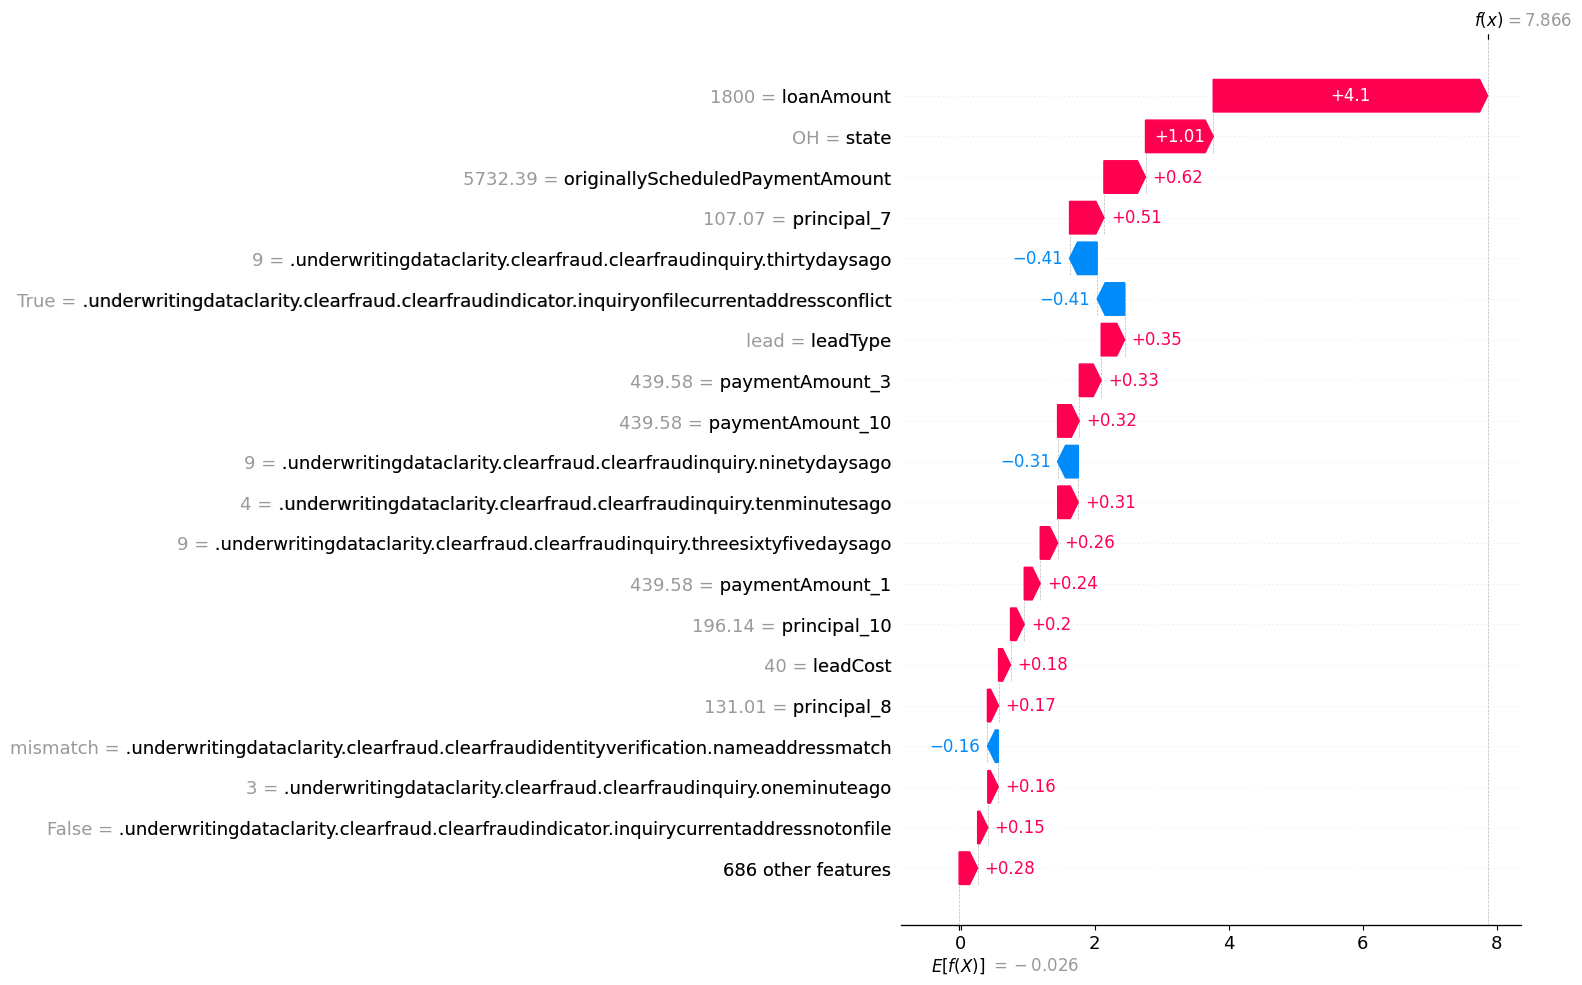

Summary Plot for XGBClassifier


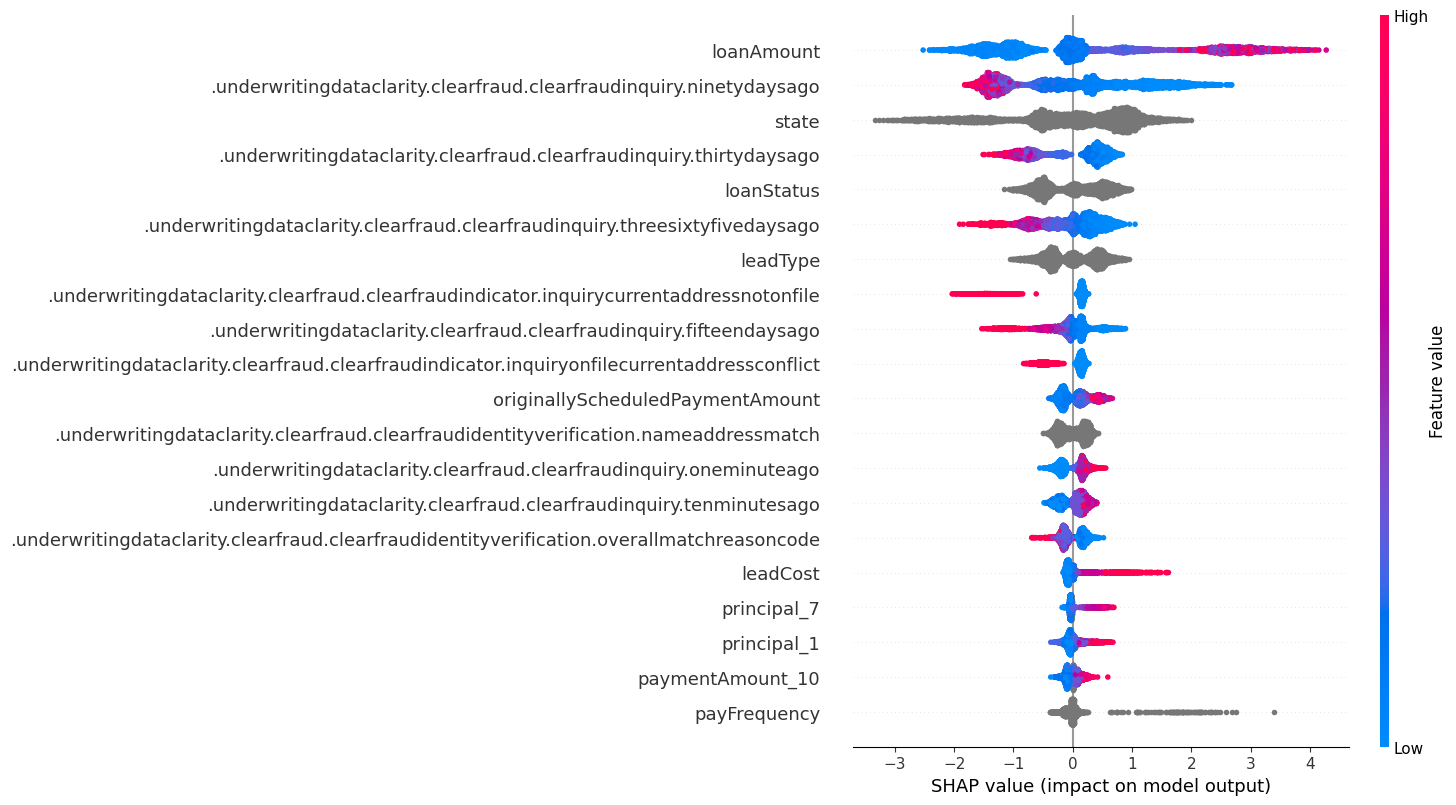

Waterfall Plot for LGBMClassifier


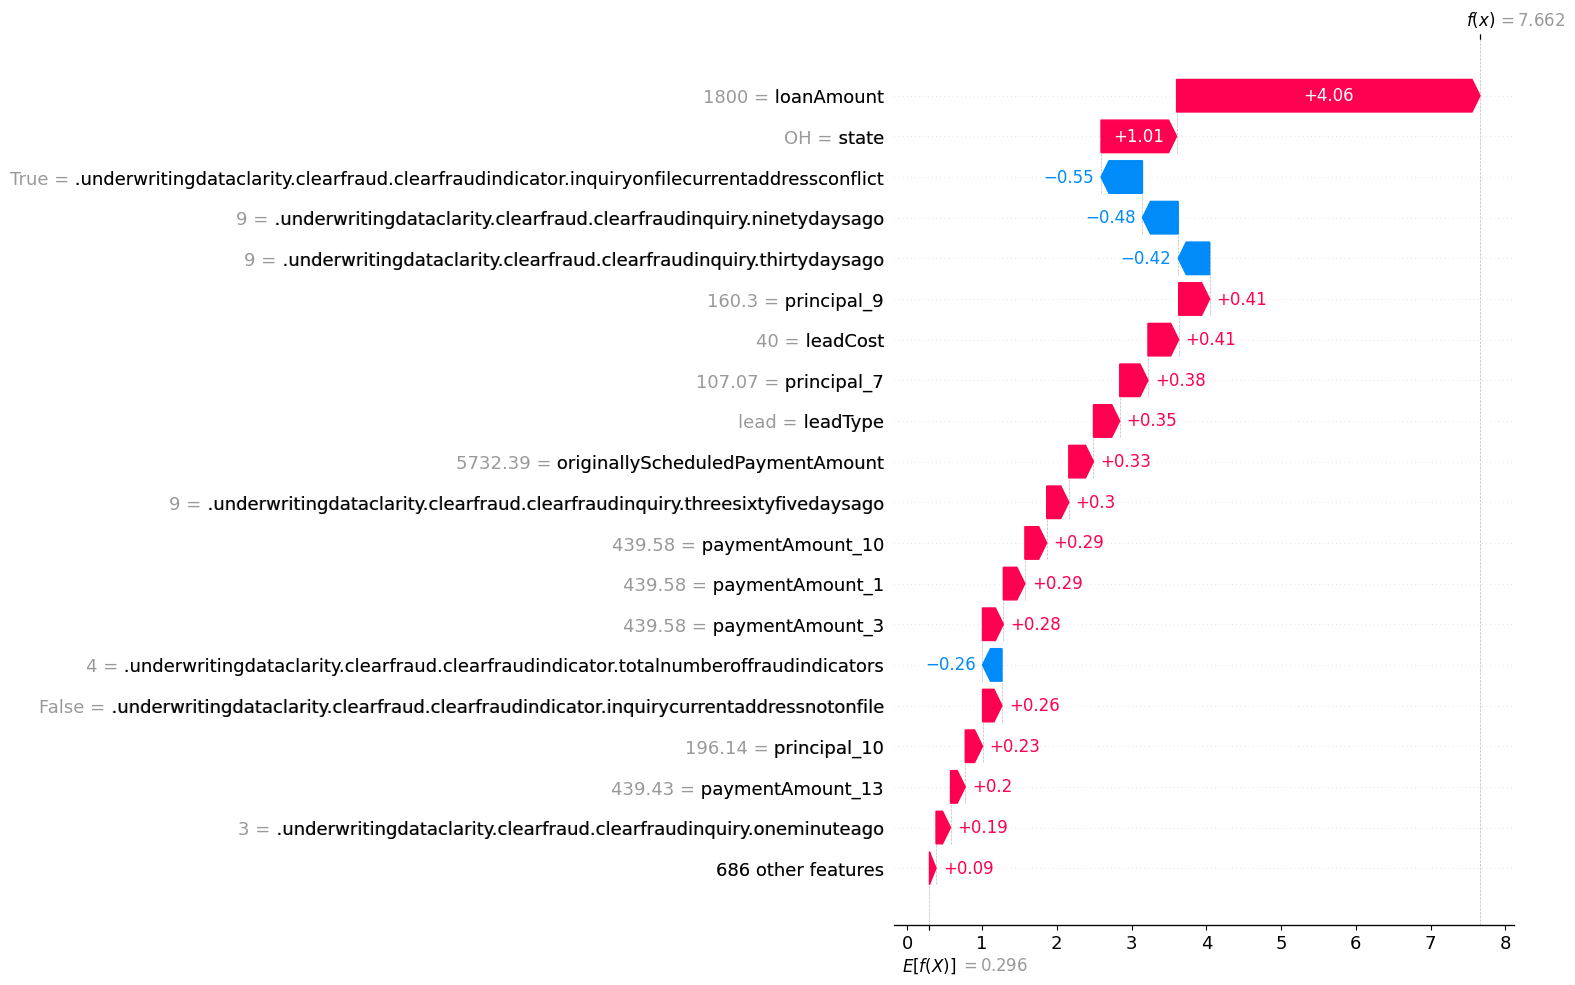

Summary Plot for LGBMClassifier


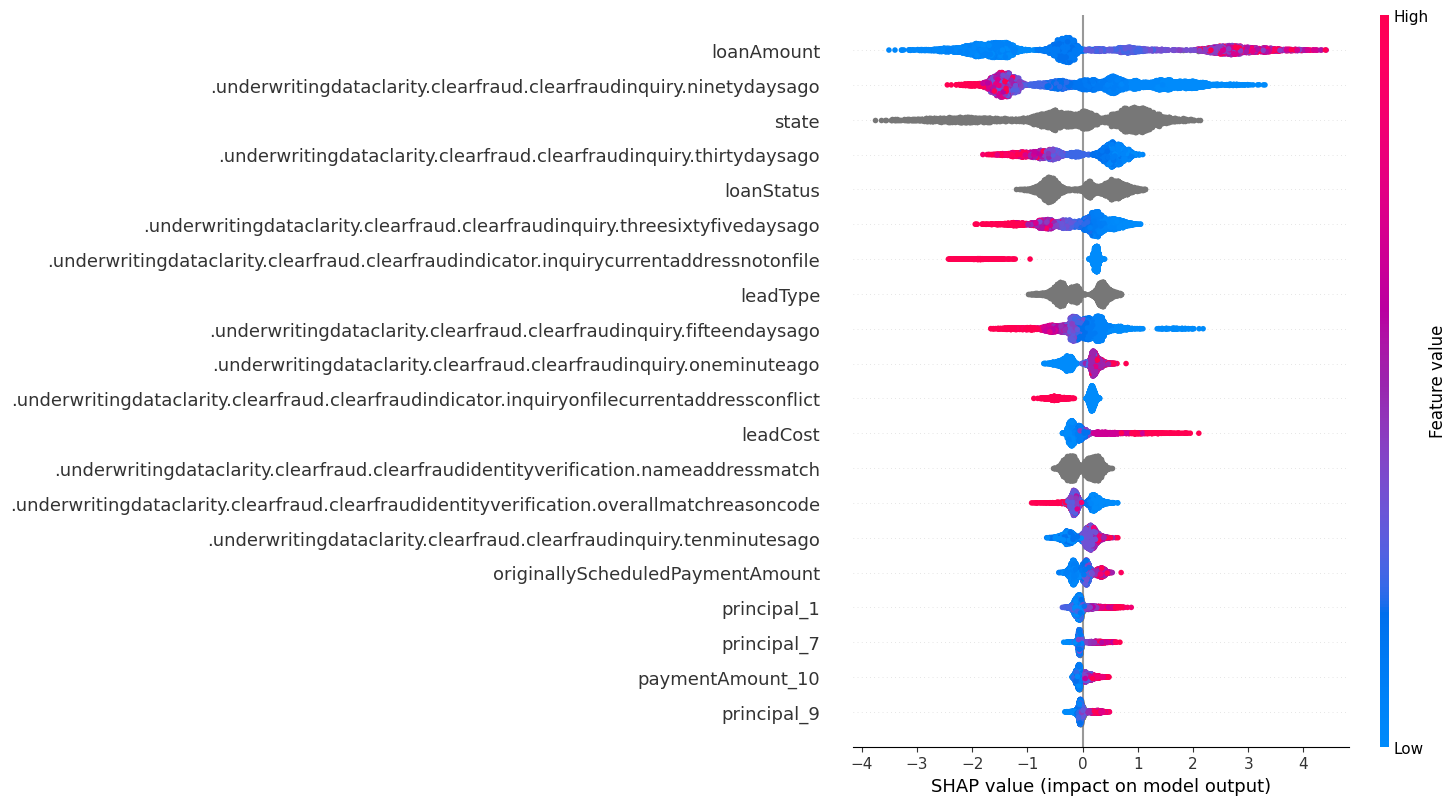

In [62]:
idx = 1  # Select one set of data to show
selected_model_to_plot = ["XGBClassifier", "LGBMClassifier"]

# Use waterfall method to show how positive OR negative contribution (important) of each respective feature to repayment of the loan 
# explain the model's predictions using SHAP
for model_name, model in zip(selected_model_to_plot, models):  
    explainer   = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
    shap_values = explainer(X_test)
    print(f"Waterfall Plot for {model_name}")
    shap.waterfall_plot(shap_values[idx], max_display=20)
    
    print(f"Summary Plot for {model_name}")
    # Use summary plot to show 
    shap.summary_plot(shap_values, X_test, max_display=20)

# <a id='toc6_'></a>[Input Prediction Pipeline for usecase](#toc0_)

User can simply replace these files in batch  _(make sure all the columns retain the same as original file does)_: 
```bash
📂 new_data/
├── 📄 clarity_underwriting_variables.csv   # Replace this file for predictions 
├── 📄 loan.csv                             # Replace this file for predictions 
└── 📄 payment.csv                          # Replace this file for predictions
```
Prediction Output
After running the following cell, the ClearFraud prediction results will be displayed:

- False (0) — Loan Repayment at Risk
- True  (1) — Loan Repayment Not at Risk

In [63]:
def predict_loan_repayment(data_dir, loan_file, payment_file, clarity_file, model):
    # Load the files
    loan_df      = pd.read_csv(loan_file)
    payment_df   = pd.read_csv(payment_file)
    clarity_df   = pd.read_csv(clarity_file)
    model_loaded = joblib.load(model)
    
    # Merge payment_df into loan_df
    payment_df['installmentIndex'] = payment_df.groupby('loanId').cumcount() + 1
    payment_df_pivot               = payment_df.pivot(index='loanId', columns='installmentIndex').reset_index()
    payment_df_pivot.columns       = ['loanId'] + [f"{col[0]}_{col[1]}" for col in payment_df_pivot.columns[1:]]
    merged_df                      = pd.merge(loan_df, payment_df_pivot, on='loanId', how='left')

    # Merge clarity_df into loan_df
    clarity_df        = clarity_df.rename(columns={'underwritingid': 'clarityFraudId'})
    merged_main       = pd.merge(merged_df, clarity_df, on='clarityFraudId', how='left')

    # Remove specified columns
    columns_to_remove   = ['loanId', 'anon_ssn', 'clarityFraudId', 'clearfraudscore']
    merged_main_cleaned = merged_main.drop(columns=columns_to_remove)
    
    # Replace fpStatus NaN with 'None'
    merged_main_cleaned['fpStatus'] = merged_main_cleaned['fpStatus'].fillna('Unknown')

    # Convert 'object' type to 'category' type for training
    merged_main_cleaned[merged_main_cleaned.select_dtypes(['object']).columns] = merged_main_cleaned.select_dtypes(['object']).apply(lambda x: x.astype('category'))

    # Convert to datetime format and extract features
    for col in ['originatedDate', 'applicationDate']:
        merged_main_cleaned[col] = pd.to_datetime(merged_main_cleaned[col], errors='coerce', format='ISO8601')
        merged_main_cleaned.insert(16, f'{col[:-4]}_Minute', merged_main_cleaned[col].dt.minute)          # Extract minute
        merged_main_cleaned.insert(16, f'{col[:-4]}_Hour'  , merged_main_cleaned[col].dt.hour)            # Extract hour
        merged_main_cleaned.insert(16, f'{col[:-4]}_Day'   , merged_main_cleaned[col].dt.day)             # Extract day
        merged_main_cleaned.insert(16, f'{col[:-4]}_Month' , merged_main_cleaned[col].dt.month)           # Extract month
        merged_main_cleaned.insert(16, f'{col[:-4]}_Year'  , merged_main_cleaned[col].dt.year)            # Extract year

    merged_main_cleaned = merged_main_cleaned.drop(columns=['applicationDate', 'originatedDate'])
    merged_main_cleaned = merged_main_cleaned.drop(columns=[col for col in merged_main_cleaned.columns if col.startswith("paymentDate")])
    
    # Reorder merged_main_cleaned columns to match X_test (affraid of different order columns)
    merged_main_cleaned = merged_main_cleaned[X_test.columns]

    # Convert merged_main_cleaned.csv columns to match X_test data types
    correct_dtypes      = X_test.dtypes.to_dict()
    for col, d_type in correct_dtypes.items():
        if col in merged_main_cleaned.columns:
            try:
                merged_main_cleaned[col] = merged_main_cleaned[col].astype(X_test[col].dtype)
            except ValueError:
                print(f"Could not convert column '{col}' to '{d_type}'. Check for incompatible data.")
    merged_main_cleaned.to_csv(f"{data_dir}final_merged_input_prediction.csv")

    # Make predictions using the trained model
    predictions = model_loaded.predict(merged_main_cleaned)


    return predictions

In [64]:
data_dir    = "new_data/"
repayment_predictions = predict_loan_repayment(
                f"{data_dir}",
                f"{data_dir}loan.csv", 
                f"{data_dir}payment.csv", 
                f"{data_dir}clarity_underwriting_variables.csv", 
                f"{data_dir}hist_gb_classifier_model.pkl")
repayment_predictions

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

# <a id='toc7_'></a>[Limitations & Future Works](#toc0_)

| Limitation                            | Future Work                                                    |
|---------------------------------------|----------------------------------------------------------------|
| **Parameter Tuning**: Limited time may have led to suboptimal hyperparameters. | Use advanced tuning methods (e.g., grid search) for better performance. |
| **Usable Data Size**: Only ~15,000 of 577,682 records is usable for training & testing. | Find a way to get the label in a reliable way. |
| **Pipeline Design**: Current pipeline may lack scalability and flexibility. | Enhance pipeline for large datasets (upsize of installmenIndex), modularity, and integration of interpretability (e.g., SHAP integration). |



<p style="background-color: #FFCCCB; color: #2C3E50; font-size: 36px; text-align: center; border-radius: 0px; font-weight: bold; border: 4px solid #9B59B6; line-height: 1.5cm; box-shadow: 0 0 15px rgba(0, 0, 0, 0.3); padding: 8px;">
    - Ending -
    <span style='font-size: 36px;'></span><br>
    <span style="color: #2C3E50; font-size: 20px;">IPython Notebook prepared by: <b> ***Heng Chia Ying*** </b><br> 
    chiayingheng@gmail.com</span>
</p>